In [2]:
import pyautogui
import time
import pyperclip
from time import gmtime, strftime

pyautogui.PAUSE = 0.3
pyautogui.FAILSAFE = True

def locate_and_click(png_file_name):
    try:
        (x, y) = pyautogui.locateCenterOnScreen(png_file_name)
        
        pyautogui.moveTo(x, y)
        time.sleep(1)
        
        pyautogui.click(x, y)
        time.sleep(1)
    except:
        print('Cannot locate:' + png_file_name)
    
def click_Blogger_tab():
    try:
        pyautogui.moveTo(650, 30)
        time.sleep(1)
        pyautogui.click()
        time.sleep(1)
    except:
        print('Cannot click Blogger tab.')
        
def click_Blog_Title():
    pyautogui.moveTo(900, 235)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

def click_Facebook_Publish_button():
    locate_and_click('FacebookPublishButton.png')    
    
def click_Super_Big_button():
    locate_and_click('SuperBigButton.png')
    
def click_Add_Image_Title_button():
    locate_and_click('TitleButton.png')
    
def click_Add_Image_Title_field():
    locate_and_click('TitleField.png')
    
def click_Font_Size():
    pyautogui.moveTo(775, 295)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
def scroll_down():
    pyautogui.moveTo(1100, 600)
    time.sleep(1)
    pyautogui.scroll(-10000) # scroll down
    time.sleep(1)
    
def click_Edit_area():    
    # click bottom of Edit area
    pyautogui.moveTo(575, 1010)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
def click_image(y):
    scroll_down()
    time.sleep(1)
    x = 700       
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
def get_file_location(file_number, file_type='original'):
    if ((file_type is 'analysis') | (file_type is 'old')):
        x = 160
    else: # 'original' or 'new'
        x = 53
    
    y = 80 + (file_number - 1) * 148
    return (x, y)

def get_file_name_location(file_number, file_type='original'):
    if ((file_type is 'analysis') | (file_type is 'old')):
        x = 160
    else: # 'original' or 'new'
        x = 53
    
    y = 114 + (file_number - 1) * 148
    return (x, y)

def get_file_name(file_number, file_type='original'):
    (file_x, file_y) = get_file_location(file_number, file_type)
    pyautogui.moveTo(file_x, file_y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

    (file_name_x, file_name_y) = get_file_name_location(file_number, file_type)
    pyautogui.moveTo(file_name_x, file_name_y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.rightClick()
    for i in range(3):
        pyautogui.press('down')
        
    #pyautogui.press('a') # Control-a
    #time.sleep(1)

    pyautogui.press('c') # copy file name to clipboard
    time.sleep(1)
    
    file_name = pyperclip.paste() # read file name from clipboard
    return file_name

def duplicate_file():
    pyautogui.rightClick()
    time.sleep(1)
    for i in range(5):
        pyautogui.press('up')
    pyautogui.press('c')
    
    pyautogui.moveRel(100, 0)
    pyautogui.rightClick()
    for i in range(4):
        pyautogui.press('down')
    pyautogui.press('p')
    time.sleep(1)
    
# Ramane file_name to file_name - Analysis
def rename_file():
    pyautogui.click()
    time.sleep(1)
    pyautogui.moveRel(0, 34)
    pyautogui.click()
    time.sleep(1)
    pyautogui.press('end')
    for i in range(4):
        pyautogui.press('left')
    for i in range(2):
        pyautogui.press('backspace')
    pyautogui.typewrite('Analysis')
    pyautogui.press('enter')
    
# Open file with Painter
def open_file():
    pyautogui.doubleClick()
    #time.sleep(7)
    time.sleep(3)
    
    # select Rectangle
    #pyautogui.moveTo(445, 65)
    pyautogui.moveTo(464, 67)
    pyautogui.click() 
    
    # select Red
    #pyautogui.moveTo(814, 62)
    
    # select Green
    pyautogui.moveTo(905, 65)
    
    # select Purple
    #pyautogui.moveTo(946, 62)
    
    # select Yellow
    #pyautogui.moveTo(858, 62)
    
    pyautogui.click() 
    
# Duplicate file, ramane it and open it with Painter
def analyze_file(file_number):
    (x, y) = get_file_location(file_number, 'original')
    pyautogui.moveTo(x, y)
    duplicate_file()
    rename_file()
    open_file()

def get_date_stamp():
    #date_stamp = time.strftime("%Y-%m-%d")
    date_stamp = time.strftime("%Y-%m-%d", gmtime())
    return date_stamp

#def get_datetime_stamp():
#    datetime_stamp = time.strftime("%Y-%m-%d %H:%M:%S", gmtime())
#    return datetime_stamp

#def get_date_stamp():
#    date_stamp = time.strftime("%Y-%m-%d")
#    return date_stamp

def get_time_stamp():
    #time_stamp = time.strftime("%Y-%m-%d %H:%M:%S", gmtime())
    #time_stamp = time.strftime("%Y-%m-%d %H:%M UTC", gmtime())
    time_stamp = time.strftime("%Y-%m-%d")
    time_stamp += ' '
    time_stamp += time.strftime("%H:%M")
    time_stamp += ' UTC+8'
    return time_stamp

def get_new_file_name(old_file_name, date_stamp):
    splt_old_file_name = old_file_name.split()
    old_date_stamp = splt_old_file_name[0]
    old_date = old_date_stamp[0:10]
    
    if date_stamp is None:
        new_date_stamp = get_date_stamp()
    else:
        new_date_stamp = date_stamp
    
    new_date = new_date_stamp[0:10]
    
    if (new_date == old_date):
        new_date_stamp = new_date + '-2'
  
    new_file_name = old_file_name.replace(old_date_stamp, new_date_stamp)
    #print('New file name: ' + new_file_name)
  
    return new_file_name

def name_file(file_number, new_file_name):
    (x, y) = get_file_location(file_number, 'new')
    pyperclip.copy(new_file_name) # copy new file name to clipboard
    pyautogui.moveTo(x, y)
    time.sleep(0.5)
    pyautogui.click()
    time.sleep(1)
    
    (x, y) = get_file_name_location(file_number, 'new')
    pyautogui.moveTo(x, y)
    time.sleep(0.5)
    pyautogui.click()
    time.sleep(1)
  
    pyautogui.rightClick()
    time.sleep(1)
    for i in range(4):
        pyautogui.press('down')
        #time.sleep(0.5)
    pyautogui.press('p') # paste new file name from clip board
    time.sleep(1)
    pyautogui.press('enter')

def click_WeChat_icon():
    pyautogui.moveTo(1500, 1079)
    time.sleep(1)
    pyautogui.moveTo(650, 1060)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

def click_WeChat_Edit_area():
    pyautogui.moveTo(1090, 935)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
# Paste a file's name to WeChat and then drag it to WeChat
def drag_to_WeChat(file_number, file_type='original'):
    # copy file name to clipboard
    get_file_name(file_number, file_type)
    
    click_WeChat_icon()
    click_WeChat_Edit_area()

    # paste file name from clipboard
    pyautogui.hotkey('ctrl', 'v')
    time.sleep(1)
    pyautogui.press('enter')    
    time.sleep(1)

    (x, y) = get_file_location(file_number, file_type)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.dragTo(1090, 935, 2)
    pyautogui.click()
    time.sleep(3)
    
    # click Send button
    x = 777
    y = 720
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    #time.sleep(3)
    time.sleep(1)

    #pyautogui.press('enter')    
    #time.sleep(1)
    
    click_WeChat_icon()
    
def name_new_file(file_number, date_stamp):
    old_file_name = get_file_name(file_number, 'old')
    time.sleep(1)
    new_file_name = get_new_file_name(old_file_name, date_stamp)
    time.sleep(1)
    name_file(file_number, new_file_name)

def name_new_files(file_number=1, to_WeChat=False, date_stamp=None):
    for i in range(file_number):
        name_new_file(i+1, date_stamp)
        
    if to_WeChat:
        for i in range(file_number):
            drag_to_WeChat(i+1)

def insert_enter():
    click_Blogger_tab()
    scroll_down()
    click_Edit_area()

    pyautogui.press('enter')
    time.sleep(1)
    
            
def insert_Analysis_file(file_number):    
    click_Blogger_tab()
    time.sleep(1)
    click_Edit_area()
    time.sleep(1)
    
    #print('file_number:', file_number)
    
    pyautogui.press('up')
    time.sleep(1)
    
    analysis_file_name = get_file_name(file_number, 'analysis')    
    (x, y) = get_file_location(file_number, 'analysis')
    
    pyautogui.moveTo(x, y)
    time.sleep(0.5)
    pyautogui.click()
    time.sleep(0.5)
    
    #print('file_number:', file_number)
    
    if (file_number == 1):
        (x, y) = (700, 400)
        pyautogui.dragTo(x, y, 2)
    else:
        (x, y) = (700, 957)
        #(x, y) = (700, 977)
        pyautogui.dragTo(x, y, 2)
    
    #time.sleep(7)
    #time.sleep(6)
    #time.sleep(15)
    time.sleep(30)

    scroll_down()

    click_Edit_area()
    
    if (file_number == 1):
        click_image(500)
    else:
        click_image(957)
        #click_image(977)
        
    scroll_down()
    
    click_Super_Big_button()
    scroll_down()
    
    click_Add_Image_Title_button()
    time.sleep(1)
    scroll_down()
    time.sleep(1)
    
    click_Add_Image_Title_field()
    time.sleep(1)
    pyautogui.tripleClick()
    time.sleep(1)
    
    # paste file name from clipboard
    pyautogui.hotkey('ctrl', 'v')
    time.sleep(1)
    
    click_Font_Size()

    pyautogui.moveRel(0, 93)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

    scroll_down()
    time.sleep(1)
    
    click_Edit_area()
    time.sleep(1)
    
    pyautogui.press('up')
    time.sleep(1)

def insert_Original_file(file_number):
    click_Blogger_tab()
    time.sleep(1)
    click_Edit_area()
    time.sleep(1)
    pyautogui.press('up')
    time.sleep(1)
    
    original_file_name = get_file_name(file_number, 'original')
    (x, y) = get_file_location(file_number, 'original')
    
    pyautogui.moveTo(x, y)
    time.sleep(0.5)
    pyautogui.click()
    time.sleep(0.5)
    
    pyautogui.dragTo(700, 957, 2)
    #time.sleep(7)
    #time.sleep(6)
    #time.sleep(15)
    time.sleep(30)
    
    scroll_down()
    
    click_Edit_area()
    time.sleep(1)
    click_image(957)
    time.sleep(1)
    scroll_down()   
    
    click_Super_Big_button()
    time.sleep(1)
    scroll_down()
    
    click_Add_Image_Title_button()
    time.sleep(1)
    scroll_down()
    
    click_Add_Image_Title_field()
    time.sleep(1)
    pyautogui.tripleClick()
    time.sleep(1)
    
    # paste file name from clipboard
    pyautogui.hotkey('ctrl', 'v')
    time.sleep(1)
    
    click_Font_Size()
    time.sleep(1)

    pyautogui.moveRel(0, 93)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

    scroll_down()
    time.sleep(1)
    click_Edit_area()
    time.sleep(1)
    pyautogui.press('up')
    time.sleep(1)

def insert_files(file_number=1):
    insert_enter()
    
    for i in range(1, file_number + 1):
        insert_Analysis_file(i)
        
    for i in range(1, file_number + 1):
        insert_Original_file(i)

def set_blog_title():
    click_Blogger_tab()
    click_Blog_Title()
    
    # paste from clipboard
    pyautogui.rightClick()
    pyautogui.press('down')
    pyautogui.press('down')
    pyautogui.press('p')
    pyautogui.press('enter')

def get_Quake_Forecast_title(
    quake_forecast, 
    languages, 
    time_stamp
):
    blog_title = {}
    for language in languages:
        blog_title[language] = quake_forecast_title[language]
        quake_number = 0
        for quake in quake_forecast:
            quake_number += 1
            blog_title[language] += '('
            blog_title[language] += str(quake_number)
            blog_title[language] += ')'
            blog_title[language] += quake['color'][language]
            blog_title[language] += Within[language]
            blog_title[language] += str(quake['time'])
            blog_title[language] += Days[language]
            blog_title[language] += quake['location'][language]
            blog_title[language] += quake['magnitude']
            blog_title[language] += Period[language]
            blog_title[language] += ' '
    
    blog_title_str = (time_stamp + ' ')
    
    for language in languages:
        blog_title_str += (blog_title[language])
    
    blog_title_str = blog_title_str.strip() # remove extra white space
    #print(blog_title_str)
    pyperclip.copy(blog_title_str) # copy to clipboard
    
    return (blog_title, blog_title_str)

def get_Quake_Forecast_text(
    quake_forecast, 
    languages, 
    time_stamp
):
    blog_text = {}
    for language in languages:
        blog_text[language] = quake_forecast_title[language] + '\n'
        quake_number = 0
        for quake in quake_forecast:
            quake_number += 1
            blog_text[language] += '('
            blog_text[language] += str(quake_number)
            blog_text[language] += ')'
            blog_text[language] += quake['color'][language]
            blog_text[language] += Within[language]
            blog_text[language] += str(quake['time'])
            blog_text[language] += Days[language]
            blog_text[language] += quake['location'][language]
            blog_text[language] += quake['magnitude']
            blog_text[language] += '\n'
        blog_text[language] += '\n'    
        blog_text[language] += author[language]
        blog_text[language] += '\n'
        blog_text[language] += time_stamp
        blog_text[language] += '\n\n\n'

    blog_text_str = ''        
    for language in languages:
        blog_text_str += blog_text[language]
    blog_text_str = blog_text_str.strip() # remove extra white space
    #print(blog_text_str)
    pyperclip.copy(blog_text_str) # copy to clipboard
    return blog_text_str
    
def get_Quake_Signals_title(
    signals, 
    languages, 
    time_stamp
): 
    blog_title = {}
    for language in languages:
        blog_title[language] = quake_signals_title[language]
        blog_title[language] += Already_happened[language]
        quake_number = 0
        for quake in signals:
            quake_number += 1
            blog_title[language] += '('
            blog_title[language] += str(quake_number)
            blog_title[language] += ')'
            blog_title[language] += quake['color'][language]
            blog_title[language] += str(quake['time'])
            blog_title[language] += ' '
            blog_title[language] += quake['location'][language]
            blog_title[language] += ' '
            blog_title[language] += quake['magnitude']
            blog_title[language] += ' '
    
    blog_title_str = (time_stamp + ' ')
    
    for language in languages:
        blog_title_str += (blog_title[language])
    
    blog_title_str = blog_title_str.strip() # remove extra white space
    #print(blog_title_str)
    pyperclip.copy(blog_title_str) # copy to clipboard
    
    return (blog_title, blog_title_str)

def get_Quake_Signals_text(
    signals, 
    languages, 
    time_stamp
):
    blog_text = {}
    for language in languages:
        blog_text[language] = quake_signals_title[language] + '\n'
        blog_text[language] += Already_happened[language] + '\n'
        quake_number = 0
        for quake in signals:
            quake_number += 1
            blog_text[language] += '('
            blog_text[language] += str(quake_number)
            blog_text[language] += ')'
            blog_text[language] += quake['color'][language]
            blog_text[language] += str(quake['time'])
            blog_text[language] += ' '
            blog_text[language] += quake['location'][language]
            blog_text[language] += ' '
            blog_text[language] += quake['magnitude']
            blog_text[language] += '\n'
        blog_text[language] += '\n'    
        blog_text[language] += author[language]
        blog_text[language] += '\n'
        blog_text[language] += time_stamp
        blog_text[language] += '\n\n\n'

    blog_text_str = ''        
    for language in languages:
        blog_text_str += blog_text[language]
    blog_text_str = blog_text_str.strip() # remove extra white space
    #print(blog_text_str)
    pyperclip.copy(blog_text_str) # copy to clipboard
    
def get_blog_address():
    click_Blogger_tab()

    pyautogui.moveTo(710, 61)
    time.sleep(1)
    #pyautogui.tripleClick()
    pyautogui.click() # click
    #time.sleep(0.1)
    pyautogui.click() # click
    #time.sleep(0.1)
    pyautogui.click() # click
    #time.sleep(0.1)
    
    pyautogui.rightClick()
    pyautogui.press('down')
    pyautogui.press('down')
    pyautogui.press('c') # copy blog address to clipboard
    blog_address = pyperclip.paste() # read blog address from clipboard
    return blog_address

def set_blog_text():
    click_Blogger_tab()
    scroll_down()
    click_Edit_area()
    pyautogui.press('backspace')

    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    #pyautogui.rightClick()
    #pyautogui.press('down')
    #pyautogui.press('down')
    #pyautogui.press('p') # paste from clipboard
    
def click_WeChat_icon():
    #pyautogui.moveTo(1000, 1079)
    pyautogui.moveTo(613, 1079)
    time.sleep(1)
    #pyautogui.moveTo(564, 1058)
    #pyautogui.moveTo(613, 1060)
    pyautogui.moveTo(655, 1060)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
def click_WeChat_Edit_area():
    pyautogui.moveTo(1090, 935)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
def post_to_WeChat(post_text):
    pyperclip.copy(post_text) # copy to clipboard
    
    click_WeChat_icon()
    click_WeChat_Edit_area()
    
    # paste Quake Forecast from clipboard
    pyautogui.hotkey('ctrl', 'v')
    time.sleep(1)
    pyautogui.press('enter')
    time.sleep(1)
    
    # darg analysis file 1 to WeChat
    x = 160
    y = 70
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.dragTo(1090, 935, 2)
    #pyautogui.click()
    #time.sleep(1)
    time.sleep(3)
    
    # click Send button
    x = 968
    y = 618
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    #time.sleep(3)
    time.sleep(1)
    
    #pyautogui.press('enter')
    #time.sleep(3)
    click_WeChat_icon()
    time.sleep(1)
    
def click_Telegram_tab():
    (x, y) = (360, 30)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click() # click
    time.sleep(1)
    
def click_Telegram_Edit_area():
    (x, y) = (1020, 1013)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click() # click
    time.sleep(1)

def post_to_Telegram(post_text):
    pyperclip.copy(post_text) # copy to clipboard
    
    click_Telegram_tab()
    click_Telegram_Edit_area()
    
    # paste Quake Forecast from clipboard
    pyautogui.hotkey('ctrl', 'v')
    time.sleep(1)
    pyautogui.press('enter')
    time.sleep(1)
    
    # darg analysis file 1 to Telegram
    x = 160
    y = 70
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.dragTo(1050, 1015, 2)
    time.sleep(3)
    
    x = 1330
    y = 300
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)


def click_Patreon_tab():
    (x, y) = (450, 30)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
def click_Patreon_New_Post_button():
    click_Patreon_tab()
    
    (x, y) = (400, 750)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

def click_Patreon_Images_button():
    click_Patreon_tab()
    
    (x, y) = (833, 594)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

def click_Patreon_Upload_Images_button():
    click_Patreon_tab()
    
    #(x, y) = (1250, 635)
    (x, y) = (1186, 588)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

def click_Patreon_Upload_Images_field():
    click_Patreon_tab()
    
    #(x, y) = (521, 807)
    (x, y) = (420, 1015)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

# paste analysis_file_name from clipboard
def paste_Patreon_analysis_file_name():
    click_Patreon_tab()
    
    pyautogui.hotkey('ctrl', 'v')
    time.sleep(1)
    
    #pyautogui.press('down') # get the file name extention (.png)
    #time.sleep(1)
    
    pyperclip.copy('.png') # copy to clipboard
    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    time.sleep(1)

    pyautogui.press('enter')
    time.sleep(5)

def click_Next_button():
    click_Patreon_tab()
    
    pyautogui.moveTo(1800, 1018)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)

def click_Patreon_Public_button():
    click_Patreon_tab()
    
    #pyautogui.moveTo(1200, 580)
    #time.sleep(1)

    #pyautogui.scroll(-5000) # scroll down to the bottom
    #time.sleep(1)
    
    pyautogui.scroll(5000) # scroll up to the top
    time.sleep(1)
   
    pyautogui.moveTo(1030, 450)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)
    

def paste_Patreon_title(title):
    click_Patreon_tab()
    
    #x, y = 855, 535
    x, y = 855, 460

    pyautogui.moveTo(x, y)
    time.sleep(1)
    
    pyautogui.scroll(-5000) # scroll down
    time.sleep(1)
    
    #pyautogui.scroll(1000) # scroll up
    #time.sleep(1)

    # click title field
    pyautogui.moveTo(x, y)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)

    pyperclip.copy(title) # copy to clipboard
    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    time.sleep(1)
    #pyautogui.press('enter')
    #time.sleep(1)
    
def paste_Patreon_text(text):
    click_Patreon_tab()

    #pyautogui.moveTo(1215, 635)
    pyautogui.moveTo(925, 925)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

    pyperclip.copy(text) # copy to clipboard
    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    time.sleep(1)
    #pyautogui.press('enter')
    #time.sleep(1)

def click_Patreon_Publish_Now_button():
    click_Patreon_tab()
    
    pyautogui.moveTo(1754, 1016)
    time.sleep(1)

    #pyautogui.scroll(5000) # scroll up
    #time.sleep(1)
    
    #pyautogui.moveTo(1720, 267)
    #time.sleep(1)

    #pyautogui.scroll(-5000) # scroll down
    #time.sleep(1)
    
    pyautogui.click()
    time.sleep(5)
      
def post_to_Patreon(title, text):
    click_Patreon_New_Post_button()
    click_Patreon_Images_button()

    click_Patreon_Upload_Images_button()
    
    analysis_file_name = get_file_name(1, file_type='analysis') 
    print(analysis_file_name)
    
    click_Patreon_Upload_Images_field()
    paste_Patreon_analysis_file_name()
    
    click_Patreon_Public_button()
    
    paste_Patreon_title(title)
    paste_Patreon_text(text)
    
    click_Patreon_Publish_Now_button()
    
def get_Patreon_address():
    click_Patreon_tab()
    
    pyautogui.moveTo(710, 61)
    time.sleep(1)
    #pyautogui.tripleClick()
    pyautogui.click() # click
    #time.sleep(0.1)
    pyautogui.click() # click
    #time.sleep(0.1)
    pyautogui.click() # click
    #time.sleep(0.1)
    
    pyautogui.rightClick()
    pyautogui.press('down')
    pyautogui.press('down')
    pyautogui.press('c') # copy address to clipboard
    Patreon_address = pyperclip.paste() # read address from clipboard
    
    return Patreon_address

def click_Facebook_tab():
    pyautogui.moveTo(565, 30)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(3)

def click_Facebook_home():
    click_Facebook_tab()
    
    pyautogui.moveTo(710, 132)
    time.sleep(1)

    pyautogui.click()
    time.sleep(3)

def click_dysondyson():
    click_Facebook_home()

def click_dysondyson_edit_field():
    pyautogui.moveTo(855, 655)
    time.sleep(1)

    pyautogui.click()
    time.sleep(1)

    pyautogui.moveTo(1000, 500)
    time.sleep(1)

    pyautogui.click()
    time.sleep(1)
    
def paste_text(text):
    pyperclip.copy(text) # copy to clipboard
    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    time.sleep(1)
    
def click_dysondyson_publish_button():
    #click_Facebook_tab()
    
    #pyautogui.scroll(-1050) # scroll down
    #time.sleep(1)

    pyautogui.moveTo(1091, 841)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)
    
def post_to_Facebook_dysondyson(text):
    click_dysondyson()
    click_dysondyson_edit_field()
    paste_text(text)
    time.sleep(3)
    click_dysondyson_publish_button()
    
    
def click_QuakeForecastInstitute():
    click_Facebook_home()
    
    pyautogui.moveTo(1615, 320)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(5)

def click_QuakeForecastInstitute_edit_field():
    click_QuakeForecastInstitute()

    #click_Facebook_tab()
    pyautogui.moveTo(1417, 670)
    time.sleep(1)
    pyautogui.scroll(-5250) # scroll down
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)
    
def post_to_Facebook_QuakeForecastInstitute(text):
    click_QuakeForecastInstitute()

    #click_Facebook_tab()
    pyautogui.moveTo(1417, 670)
    time.sleep(1)
    pyautogui.scroll(-5250) # scroll down
    time.sleep(1)

    #click_Facebook_tab()
    pyautogui.moveTo(1417, 670)
    time.sleep(1)

    pyautogui.click()
    time.sleep(1)

    paste_text(post_text)

    pyautogui.moveTo(1058, 1056)
    time.sleep(1)

    pyautogui.click()
    time.sleep(1)

def post_to_Facebook_QuakeTomato(text):
    click_Facebook_tab()

    pyautogui.moveTo(1425, 117)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.moveTo(331, 580)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)

    pyautogui.moveTo(713, 970)
    time.sleep(1)
    
    pyautogui.scroll(10000) # scroll up
    time.sleep(1)

    #pyautogui.scroll(-200) # scroll down
    #time.sleep(1)
    
    pyautogui.moveTo(713, 970)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)

    pyperclip.copy(text) # copy to clipboard
    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    time.sleep(1)

    pyautogui.scroll(-2000) # scroll down
    time.sleep(1)
    
    locate_and_click('Facebook_Group_Publish_button.png')
    #pyautogui.moveTo(713, 814)
    time.sleep(10)
    
    pyautogui.scroll(-1000) # scroll down
    time.sleep(1)

    #pyautogui.moveTo(1317, 119)
    #time.sleep(1)
    
    #pyautogui.click()
    #time.sleep(1)
    
    #for i in range(0, 12):
    #    pyautogui.press('tab')
    #    time.sleep(1)
    #pyautogui.press('enter')
    #time.sleep(1)

def post_to_Facebook_Japanese_group(text):
    click_Facebook_tab()

    pyautogui.moveTo(1425, 117)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.moveTo(315, 630)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)

    pyautogui.moveTo(713, 970)
    time.sleep(1)
    
    pyautogui.scroll(10000) # scroll up
    time.sleep(1)

    #pyautogui.scroll(-200) # scroll down
    #time.sleep(1)
    
    pyautogui.moveTo(713, 970)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)

    pyperclip.copy(text) # copy to clipboard
    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    time.sleep(1)

    pyautogui.scroll(-2000) # scroll down
    time.sleep(1)
    
    locate_and_click('Facebook_Group_Publish_button.png')
    #pyautogui.moveTo(713, 814)
    time.sleep(10)
    
    pyautogui.scroll(-1000) # scroll down
    time.sleep(1)

    #pyautogui.moveTo(1317, 119)
    #time.sleep(1)
    
    #pyautogui.click()
    #time.sleep(1)
    
    #for i in range(0, 12):
    #    pyautogui.press('tab')
    #    time.sleep(1)
    #pyautogui.press('enter')
    #time.sleep(1)

def publish_blog():
    pyautogui.moveTo(1715, 219)
    time.sleep(5)
    pyautogui.click()
    time.sleep(1)
    
def view_blog():
    click_Blogger_tab()
    time.sleep(1)
    pyautogui.moveTo(833, 504)
    time.sleep(1)
    pyautogui.moveTo(833, 506)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

def close_Blogger_article_list():
    click_Blogger_tab()
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.rightClick()
    time.sleep(1)

    for i in range(0, 9):
        pyautogui.press('down')
    
    time.sleep(1)
    pyautogui.press('enter')

    pyautogui.moveRel(80, 0)
    time.sleep(2)
    
    
    
def post_Quake_Forecast(
    quake_forecast, 
    time_stamp,
    blog_address, 
    blog_title_str
):
    # Post to Telegram
    Telegram_languages = ['Chinese', 'Japanese', 'English']
    (blog_title_Telegram, blog_title_str_Telegram) = get_Quake_Forecast_title(
        quake_forecast,
        Telegram_languages, 
        time_stamp)
    post_text_Telegram = blog_title_str_Telegram + '\n' + blog_address
    pyperclip.copy(post_text_Telegram) # copy to clipboard
    post_to_Telegram()

    # Post to WeChat
    post_text_WeChat = blog_title_str + '\n' + blog_address    
    pyperclip.copy(post_text_WeChat) # copy to clipboard
    post_to_WeChat()

    # Post to Patreon
    post_text_Patreon = post_text_WeChat
    post_to_Patreon(blog_title_str, post_text_Patreon)

    # Post to Facebook
    Patreon_address = get_Patreon_address()
    #print(Patreon_address)
    text_Facebook = blog_title_str + '\n' + Patreon_address
    print(text_Facebook)
    post_to_Facebook_dysondyson(text_Facebook)
    post_to_Facebook_QuakeForecastInstitute(text_Facebook)
    post_to_Facebook_QuakeTomato(text_Facebook)
    post_to_Facebook_Japanese_group(text_Facebook)
    click_dysondyson()
    

def publish_Quake_Forecast(quake_forecast, languages, time_stamp):
    (blog_title, blog_title_str) = get_Quake_Forecast_title(quake_forecast, 
                                          languages, time_stamp)
    set_blog_title()
    get_Quake_Forecast_text(quake_forecast, languages, time_stamp)
    set_blog_text()
    publish_blog()
    time.sleep(15)
    return (blog_title, blog_title_str)    
    
quake_forecast_title = {
    'Chinese': '地震預報：',
    'Japanese': '地震予報：',
    'English': 'Quake Forecast: ',
    'Turkish': 'Deprem Tahmini: ',
}

quake_signals_title = {
    'Chinese': '地震訊號：',
    'Japanese': '地震信号：',
    'English': 'Quake Signals: ',
    'Turkish': 'Deprem Sinyalleri: ',
}

author = {
    'Chinese': '台灣地震預測研究所 所長\n林湧森',
    'Japanese': '台湾地震予測研究所 所長\n林湧森',
    'English': 'Dyson Lin\nFounder & CEO, Taiwan Quake Forecast Institute',
    'Turkish': 'Dyson Lin\nKurucu ve CEO, Tayvan Deprem Tahmin Enstitüsü',
}

Already_happened = {
    'Chinese': '已經發生：',
    'Japanese': '発生しました：',
    'English': 'Already happened: ',
    'Turkish': 'Zaten oldu: ',
}

Within = {
    'Chinese': '',
    'Japanese': '',
    'English': 'Within ',
    'Turkish': 'İçinde ',
}

Days = {
    'Chinese': '天以內，',
    'Japanese': '日間以內に、',
    'English': ' days, ',
    'Turkish': ' günler, ',
}

Period = {
    'Chinese': '。',
    'Japanese': '。',
    'English': '.',
    'Turkish': '.',
}

Red = {
    'Chinese': '紅：',
    'Japanese': '赤：',
    'English': 'Red: ',
    'Turkish': 'Kırmızı: ',
}

Orange = {
    'Chinese': '橙：',
    'Japanese': 'オレンジ：',
    'English': 'Orange: ',
    'Turkish': 'Portakal: ',
}

Yellow = {
    'Chinese': '黃：',
    'Japanese': '黃：',
    'English': 'Yellow: ',
    'Turkish': 'Sarı: ',
}

Green = {
    'Chinese': '綠：',
    'Japanese': '綠：',
    'English': 'Green: ',
    'Turkish': 'Yeşil: ',
}

Blue = {
    'Chinese': '藍：',
    'Japanese': '青：',
    'English': 'Blue: ',
    'Turkish': 'Mavi: ',
}

Purple = {
    'Chinese': '紫：',
    'Japanese': '紫：',
    'English': 'Purple: ',
    'Turkish': 'Mor: ',
}

In [2]:
get_time_stamp()

'2024-11-15 04:11 UTC+8'

In [ ]:
insert_enter()
insert_Analysis_file(1)
insert_Analysis_file(2)
#insert_Analysis_file(3)

In [ ]:
日本奈良站開始運轉。
可喜可賀。

日本奈良局が稼動を開始しました。
喜ばしいです。

Nara, Japan Station has started running.
Congratulations.

台灣地震預測研究所 所長 
林湧森
台湾地震予測研究所 所長 
林湧森
Dyson Lin
Founder & CEO, Taiwan Quake Forecast Institute
2020-06-26 22:22 UTC+8

In [ ]:
2015-02-16 23:06 UTC Miyako, Japan M6.7
2016-02-05 19:57 UTC Yujing, Taiwan M6.4
2016-07-29 21:18 UTC Agrihan, Northern Mariana Islands M7.7
2017-07-17 23:34 UTC Nikol'skoye, Russia M7.7 

In [ ]:
2015-09-16 22:54 UTC Illapel, Chile M8.3
2016-12-17 10:51 UTC Taron, Papua New Guinea M7.9

In [ ]:
2017-09-08 04:49 UTC Tres Picos, Mexico M8.2
2018-08-19 00:19 UTC Ndoi Island, Fiji M8.2 
2018-09-28 10:02 UTC Palu, Indonesia M7.5
2019-05-26 07:41 UTC Lagunas, Peru M8.0
2019-07-06 03:19 UTC California M7.1
2019-08-29 15:07 UTC Oregon M6.3
2020-01-28 19:10 UTC Lucea, Jamaica M7.7
2020-03-25 02:49 UTC Kuril Islands, Russia M7.5
2020-07-22 06:12 UTC Perryville, Alaska M7.8
2021-03-04 19:28 UTC Kermadec Islands, New Zealand M8.1
2021-07-29 06:15 UTC Perryville, Alaska M8.2

In [ ]:
1994-01-17 12:30 UTC California M6.7 
1995-01-16 20:46 UTC Japan M6.9
2008-05-12 06:28 UTC Sichuan, China M7.9
2011-03-09 02:45 UTC near the east coast of Honshu, Japan M7.3
2011-03-11 05:46 UTC Great Tohoku Earthquake, Japan M9.1

In [ ]:
2019-11-26 02:54 UTC Mamurras, Albania M6.4
2020-01-24 17:55 UTC Elazig, Turkey M6.7
2020-02-23 16:00 UTC Near Van, Turkey M6.0
2020-05-02 12:51 UTC Ierapetra, Greece M6.6
2020-10-30 11:51 UTC Néon Karlovásion, Greece M7.0
2020-12-29 11:19 UTC Petrinja, Croatia M6.4
2021-03-03 10:16 UTC Týrnavos, Greece M6.3
        
2020-01-18 16:38 UTC Indonesia M6.0
2020-01-19 16:58 UTC Indonesia M6.1
2020-02-05 18:12 UTC Ujungpangkah, Indonesia M6.2
2020-02-06 13:40 UTC Pondaguitan, Philippines M6.0
2020-02-09 06:04 UTC Kokopo, Papua New Guinea M6.2
2020-03-18 17:45 UTC Kangin, Indonesia M6.2

2019-12-24 19:03 UTC Lejanias, Colombia M6.0
2020-01-07 08:24 UTC Indios, Puerto Rico 6.4
2020-01-28 19:10 UTC Lucea, Jamaica M7.7

In [ ]:
2020-02-13 10:33 UTC Kuril Islands, Russia M7.0
2020-03-25 02:49 UTC Kuril Islands, Russia M7.5
2020-03-31 23:52 UTC Challis, Idaho M6.5
2020-04-18 08:25 UTC Chichi-shima, Japan M6.6
2020-04-19 20:39 UTC Ofunato, Japan M6.3
2020-04-25 02:53 UTC Panguna, Papua New Guinea M6.3
2020-05-02 12:51 UTC Ierapetra, Greece M6.6
2020-05-03 03:24 UTC Taitung, Taiwan M5.1
2020-05-06 13:53 UTC Saumlaki, Indonesia M6.8
2020-05-12 22:41 UTC Lata, Solomon Islands M6.6
2020-05-15 11:03 UTC Tonopah, Nevada M6.5
2020-05-18 04:18 UTC Ierapetra, Greece M5.3 
2020-05-18 23:22 UTC Gra Liyia, Greece M5.8
2020-05-22 08:46 UTC San Jose del Cabo, Mexico M6.1
2020-05-30 18:13 UTC Kushiro, Japan M5.6  
2020-05-31 05:09 UTC Lampa, Peru M6.0 
2020-06-03 07:35 UTC San Pedro de Atacama, Chile M6.8
2020-06-04 08:49 UTC Tobelo, Indonesia M6.4
2020-06-05 18:06 UTC Malatya, Turkey M5.3 
2020-06-07 01:49 UTC Hualien, Taiwan M4.8
2020-06-08 14:34 UTC Taitung, Taiwan M4.3
2020-06-11 01:38 UTC Yilan, Taiwan M5.2
2020-06-13 15:51 UTC Naze, Japan M6.6
2020-06-13 20:19 UTC Yilan, Taiwan M6.0
2020-06-14 14:24 UTC Bingol, Turkey M5.9
2020-06-18 12:49 UTC Opotiki, New Zealand M7.4
2020-06-19 07:43 UTC Néa Anatolí, Greece M5.0 
2020-06-20 01:57 UTC Hihifo, Tonga M5.4
2020-06-23 07:43 UTC Gorontalo, Indonesia M5.9 
2020-06-23 15:29 UTC Santa María Zapotitlán, Mexico M7.4
2020-06-25 21:05 UTC Hotan, China M6.4
2020-06-26 07:21 UTC Manisa, Turkey M5.5
2020-06-26 23:27 UTC Kaohsiung, Taiwan M4.8
2020-06-28 17:43 UTC Mugla, Turkey M5.4  
2020-07-17 02:50 UTC Popondetta, Papua New Guinea M7.0
2020-07-18 12:30 UTC Yonakuni, Japan M4.5
2020-07-18 15:32 UTC Hihifo, Tonga M6.1
2020-07-22 06:12 UTC Perryville, Alaska M7.8
2020-07-26 12:52 UTC Yilan, Taiwan M6.1
2020-08-01 17:09 UTC Polloc, Philippines M6.4
2020-08-03 08:31 UTC Saipan, Northern Mariana Islands M5.6
2020-08-04 09:37 UTC Malatya, Turkey M5.7
2020-08-21 04:09 UTC Katabu, Indonesia M6.9

In [ ]:
1995-01-16 20:46 UTC western Honshu, Japan M6.9
1999-09-20 17:47 UTC Nantou, Taiwan 南投 Musgs7.7 Mtaiwan 7.3
2011-03-09 02:45 UTC Honshu, Japan M7.3
2011-03-11 05:46 UTC Honshu, Japan M9.1
2016-04-14 12:26 UTC Kumamoto, Japan M6.2
2016-04-15 16:25 UTC Kumamoto, Japan M7.0
2018-09-05 18:07 UTC Tomakomai, Japan M6.6
2019-09-26 10:59 UTC Silivri, Turkey M5.7

In [ ]:
1999-08-17 00:01 UTC İzmit, Turkey M7.6
1999-09-20 17:47 UTC Nantou, Taiwan M7.7
1999-11-12 16:57 UTC Düzce, Turkey M7.2
2020-01-24 17:55 UTC Elazig, Turkey M6.7

In [14]:
2020-08-04 09:37 UTC Malatya, Turkey M5.7
2020-08-11 01:01 UTC Yilan, Taiwan M4.7
2020-08-11 05:29 UTC Taitung, Taiwan M4.6 
2020-08-11 23:07 UTC Yonakuni, Japan M4.5
2020-08-12 22:32 UTC Basco, Philippines M5.5 
2020-08-16 02:53 UTC Basco, Philippines M5.0
2020-08-16 07:22 UTC Bantogon, Philippines M5.2 
2020-08-17 07:27 UTC Ýdra, Greece M5.0
2020-08-18 00:03 UTC San Pedro, Philippines M6.6
2020-08-18 22:23 UTC Bengkulu, Indonesia M6.8
2020-08-18 22:29 UTC Bengkulu, Indonesia M6.9
2020-08-21 04:09 UTC Katabu, Indonesia M6.9
2020-08-24 04:21 UTC Kayseri, Turkey M2.6
2020-09-12 02:44 UTC Ōfunato, Japan M6.1
2020-09-15 03:41 UTC Esso, Russia M6.4
2020-10-19 20:54 UTC Sand Point, Alaska M7.6
2020-10-30 11:51 UTC Néon Karlovásion, Greece M7.0
2020-11-22 00:54 UTC Constitución, Chile M6.1
2020-11-30 22:54 UTC Sovetskaya Gavan', Russia M6.4
2020-12-10 13:19 UTC Yilan, Taiwan M6.1
2020-12-20 17:23 UTC Hachinohe, Japan M6.3
2020-12-24 23:43 UTC Calatagan, Philippines M6.3
2020-12-27 21:39 UTC Corral, Chile M6.7
2020-12-29 11:19 UTC Petrinja, Croatia M6.4
2021-01-03 12:38 UTC Adak, Alaska M6.1
2021-01-06 20:59 UTC Gorontalo, Indonesia M6.1
2021-01-09 11:35 UTC Yilan, Taiwan M5.7
2021-01-11 21:32 UTC Turt, Mongolia M6.7 
2021-01-14 18:28 UTC Mamuju, Indonesia M6.2 
2021-01-21 12:23 UTC Pondaguitan, Philippines M7.0
2021-02-03 05:23 UTC Easter Island M6.9
2021-02-06 17:36 UTC Yonakuni, Japan M5.4
2021-02-10 13:19 UTC Loyalty Islands M7.7 
2021-02-13 14:07 UTC Namie, Japan M7.1
2021-03-03 10:16 UTC Týrnavos, Greece M6.3
2021-03-04 13:27 UTC Gisborne, New Zealand M7.3   
2021-03-04 17:41 UTC Kermadec Islands, New Zealand M7.4
2021-03-04 19:28 UTC Kermadec Islands, New Zealand M8.1
2021-03-18 00:04 UTC Bejaïa, Algeria M6.0
2021-03-20 09:09 UTC Ishinomaki, Japan M7.0
2021-03-26 22:02 UTC Hirara, Japan M5.9
2021-04-18 14:14 UTC Hualien, Taiwan M5.8
2021-05-21 18:04 UTC Southern Qinghai, China M7.3
2021-07-21 21:15 UTC Punta de Burica, Panama M6.7
2021-07-23 20:48 UTC Hukay, Philippines M6.7
2021-07-24 12:51 UTC Kermadec Islands M6.1
2021-07-26 12:09 UTC Luwuk, Indonesia M6.2
2021-07-29 06:15 UTC Perryville, Alaska M8.2 
2021-08-04 21:50 UTC Yilan, Taiwan M5.8
2021-08-11 17:46 UTC Pondaguitan, Philippines M7.1
2021-08-12 18:32 UTC South Sandwich Islands M7.5
2021-08-12 18:35 UTC South Sandwich Islands M8.1
2021-08-14 11:57 UTC Perryville, Alaska M6.9 
2021-08-14 12:29 UTC Saint-Louis du Sud, Haiti M7.2 
2021-08-18 10:10 UTC Port-Olry, Vanuatu M6.9
2021-09-08 01:47 UTC Acapulco, Mexico M7.0
2021-09-13 10:41 UTC Puli, Taiwan M4.9
2021-09-25 22:21 UTC Hualien City, Taiwan M5.0 
2021-09-26 17:12 UTC Talisay, Philippines M5.7
2021-09-29 08:37 UTC Nanao, Japan M6.1
2021-10-09 10:58 UTC Vanuatu M6.8
2021-10-24 05:11 UTC Yilan, Taiwan M6.2 
2021-11-10 15:45 UTC Hirara, Japan M6.6 
2021-11-25 23:45 UTC Falam, Myanmar M6.2
2021-11-28 10:52 UTC Barranca, Peru M7.5
2021-11-29 12:40 UTC Izu Islands, Japan M6.3
2021-11-30 10:36 UTC Kavieng, Papua New Guinea M6.3
2021-12-04 23:47 UTC Tobelo, Indonesia M6.0
2021-12-08 00:36 UTC Oregon M5.8 
2021-12-08 01:21 UTC Oregon M5.8
2021-12-09 02:05 UTC Naze, Japan M6.0
2021-12-14 03:20 UTC Maumere, Indonesia M7.3
2021-12-20 20:10 UTC Petrolia, California M6.2
2021-12-22 23:22 UTC La Cruz de Loreto, Mexico M6.0
2021-12-26 15:42 UTC Levuka, Fiji M6.1
2021-12-26 08:26 UTC Hirara, Japan M5.9
2021-12-29 18:25 UTC Lospalos, Timor Leste M7.3
2022-01-03 09:46 UTC Hualien, Taiwan M6.0 
2022-01-07 17:45 UTC Jinchang, China M6.6 
2022-01-11 11:35 UTC Nikolski, Alaska M6.8
2022-01-14 09:05 UTC Labuan, Indonesia M6.6
2022-01-15 04:20 UTC Tonga Volcano Eruption
2022-01-21 16:08 UTC Saiki, Japan M6.3
2022-01-25 14:35 UTC Yilan, Taiwan M4.5
2022-01-27 06:40 UTC Pangai, Tonga M6.2 
2022-01-28 11:14 UTC Arenas, Panama M6.1
2022-01-29 02:46 UTC Kermadec Islands M6.5
2022-02-03 15:58 UTC Barranca, Peru M6.5
2022-02-07 10:58 UTC Yilan, Taiwan M5.2
2022-02-11 16:43 UTC Hualien, Taiwan M5.5
2022-02-16 07:12 UTC Nueva Concepción, Guatemala M6.2
2022-02-16 20:21 UTC Fiji M6.8
2022-02-20 06:39 UTC Yonakuni, Japan M4.7 
2022-02-21 20:52 UTC Naha, Japan M5.5
2022-02-22 06:12 UTC Abra Pampa, Argentina M6.0
2022-02-25 01:39 UTC Bukittinggi, Indonesia M6.2 
2022-02-25 08:50 UTC Naha, Japan M5.3
2022-03-01 03:18 UTC Naha, Japan M4.8
2022-03-02 12:52 UTC Kermadec Islands, New Zealand M6.6
2022-03-03 04:49 UTC Naha, Japan M4.6
2022-03-03 15:10 UTC Izu Islands, Japan M4.7
2022-03-06 01:13 UTC Naze, Japan M5.1 
2022-03-06 03:51 UTC Jiufen, Taiwan M4.5
2022-03-07 18:05 UTC Yonakuni, Japan M4.6 
2022-03-09 12:22 UTC Taitung, Taiwan M5.2
2022-03-13 21:05 UTC Cabra, Philippines M6.4
2022-03-13 21:09 UTC Pariaman, Indonesia M6.7
2022-03-15 06:40 UTC Naha, Japan M4.9
2022-03-16 00:34 UTC Hengchun, Taiwan M4.2
2022-03-16 14:34 UTC Namie, Japan M6.4
2022-03-16 14:36 UTC Namie, Japan M7.3
2022-03-16 15:52 UTC Ishinomaki, Japan M5.5 
2022-03-17 11:33 UTC Naha, Japan M5.6 
2022-03-17 12:52 UTC Naha, Japan M5.2
2022-03-18 12:50 UTC Hualien, Taiwan M4.8 
2022-03-18 19:04 UTC Ishigaki, Japan M5.9
2022-03-22 16:35 UTC northern Mid-Atlantic Ridge M6.7
2022-03-22 17:41 UTC Hualien, Taiwan M6.7 
2022-03-26 15:38 UTC Naha, Japan M5.4
2022-03-29 17:36 UTC Naha, Japan M5.4
2022-03-30 20:56 UTC Tadine, New Caledonia M6.9  
2022-03-31 05:44 UTC Tadine, New Caledonia M7.0
2022-03-31 19:50 UTC Loyalty Islands M6.3
2022-04-07 23:36 UTC Hengchun, Taiwan M5.7
2022-04-09 20:52 UTC Norsup, Vanuatu M6.3
2022-04-13 01:22 UTC Naha, Japan M5.6
2022-04-19 01:23 UTC Santiago, Philippines M6.1
2022-04-19 01:23 UTC Santiago, Philippines M6.1
2022-04-21 07:42 UTC Masachapa, Nicaragua M6.7
2022-05-09 06:23 UTC Yonakuni, Japan M6.3
2022-05-09 22:33 UTC Lorengau, Papua New Guinea M6.3
2022-05-10 23:06 UTC San Antonio de los Cobres, Argentina M6.8
2022-05-19 10:13 UTC Macquarie Island M6.9
2022-05-21 21:50 UTC Bungahan, Philippines M6.1
2022-05-22 07:06 UTC Fiji Islands M6.3
2022-05-22 15:17 UTC Katsuura, Japan M6.0
2022-05-26 12:02 UTC Azángaro, Peru M7.2
2022-05-26 15:37 UTC Loyalty Islands M6.4
2022-05-26 18:10 UTC southern East Pacific Rise M6.2
2022-05-27 02:36 UTC Lospalos, Timor Leste M6.2 
2022-06-01 09:00 UTC Linqiong, China M5.9
2022-06-04 13:07 UTC Neiafu, Tonga M6.3
2022-06-04 13:17 UTC Macquarie Island M6.4
2022-06-04 23:38 UTC Alaska M6.3
2022-06-07 01:57 UTC Yonakuni, Japan M5.1
2022-06-08 05:32 UTC Mamuju, Indonesia M5.8
2022-06-08 00:55 UTC Tarauacá, Brazil M6.5
2022-06-09 16:03 UTC Tianpeng, China M5.6
2022-06-09 17:28 UTC Tianpeng, China M5.9 
2022-06-20 01:05 UTC Hualien, Taiwan M5.9
2022-06-21 07:14 UTC Bonin Islands, Japan M5.9 
2022-06-21 20:54 UTC Khōst, Afghanistan M5.9
2022-06-25 03:37 UTC Kīsh, Iran M5.6
2022-06-30 18:40 UTC Namuac, Philippines M6.0 
2022-07-01 21:32 UTC Bandar-e Lengeh, Iran M6.0
2022-07-01 23:24 UTC Bandar-e Lengeh, Iran M5.7
2022-07-01 23:25 UTC Bandar-e Lengeh, Iran M6.0 
2022-07-11 21:10 UTC Port-Vila, Vanuatu M6.0
2022-07-12 19:17 UTC Easter Island M6.8
2022-07-15 19:37 UTC Aisen, Chile M6.4
2022-07-27 00:43 UTC Dolores, Philippines M7.0 
2022-07-27 18:58 UTC Calama, Chile M6.2
2022-07-28 04:15 UTC Tocopilla, Chile M6.1
2022-08-14 13:44 UTC Kermadec Islands M6.6
2022-08-14 21:04 UTC Loyalty Islands M6.4
2022-08-23 14:31 UTC Pagar Alam, Indonesia M6.2
2022-08-30 09:09 UTC Pacific-Antarctic Ridge M6.3
2022-09-02 22:39 UTC Kandrian, Papua New Guinea M6.1
2022-09-04 09:42 UTC Mid-Atlantic Ridge M6.9
2022-09-04 23:57 UTC East Pacific Rise M6.2
2022-09-05 04:52 UTC Kangding, China M6.6
2022-09-09 23:31 UTC Biak, Indonesia M6.2
2022-09-10 00:05 UTC Papua, Indonesia M6.2
2022-09-10 23:10 UTC Pariaman, Indonesia M6.0 
2022-09-10 23:46 UTC Kainantu, Papua New Guinea M7.6
2022-09-14 11:04 UTC Isangel, Vanuatu M7.0
2022-09-17 13:41 UTC Taitung, Taiwan M6.5
2022-09-18 06:44 UTC Taitung, Taiwan M6.9
2022-09-19 18:05 UTC Colima-Michoacan, Mexico M7.6
2022-09-20 18:23 UTC Kamchatsk Staryy, Russia M6.0
2022-09-22 06:16 UTC Michoacan, Mexico M6.8
2022-09-23 20:52 UTC Sumatra, Indonesia M6.2
2022-09-23 22:53 UTC Ancud, Chile M6.1
2022-09-29 03:03 UTC South Sandwich Islands M6.5
2022-10-01 01:18 UTC Reykjanes Ridge M6.0 
2022-10-09 16:38 UTC Mid-Atlantic Ridge M6.2
2022-10-10 19:24 UTC Hualien, Taiwan M5.7
2022-10-13 22:20 UTC Kokopo, Papua New Guinea M6.4
2022-10-16 12:48 UTC Central America M6.3 
2022-10-20 11:57 UTC Boca Chica, Panama M6.7
2022-10-25 00:13 UTC South Sandwich Islands M6.3
2022-10-25 14:59 UTC Dolores, Philippines M6.4
2022-10-25 18:42 UTC Alum Rock, CA M5.1
2022-10-28 15:30 UTC Yilan, Taiwan M4.6
2022-10-31 08:48 UTC Taitung, Taiwan M4.9 
2022-11-01 08:30 UTC Yonakuni, Japan M5.4
2022-11-02 04:53 UTC North Pacific Ocean M6.0
2022-11-02 14:17 UTC South Sandwich Islands M6.1 
2022-11-04 10:02 UTC Bahía de Kino, Mexico M6.1 
2022-11-09 09:38 UTC Fiji M6.8
2022-11-09 09:51 UTC Fiji M7.0
2022-11-09 10:14 UTC Fiji M6.6 
2022-11-11 10:48 UTC Neiafu, Tonga M7.3
2022-11-12 07:09 UTC Fiji M7.0 
2022-11-13 02:24 UTC Bio-Bio, Chile M6.2
2022-11-14 05:04 UTC Fiji M6.1
2022-11-14 08:08 UTC Toba, Japan M6.1 
2022-11-18 13:37 UTC Bengkulu, Indonesia M6.9
2022-11-20 01:49 UTC Yilan, Taiwan M5.1
2022-11-22 02:03 UTC Solomon Islands M7.0
2022-11-22 16:39 UTC Las Brisas, Mexico M6.2 
2022-11-23 01:08 UTC Düzce, Turkey M6.1 
2022-11-26 17:38 UTC Hualien, Taiwan M5.1
2022-12-04 19:24 UTC Hihifo, Tonga M6.7
2022-12-07 16:54 UTC Hualien, Taiwan M5.1
2022-12-11 14:31 UTC El Ticui, Mexico M6.0
2022-12-14 18:40 UTC Rat Islands, Aleutian Islands, Alaska M6.3
2022-12-15 04:03 UTC Hualien, Taiwan M5.9
2022-12-20 10:34 UTC Ferndale, California M6.4
2022-12-28 16:34 UTC Isangel, Vanuatu M6.0 
2023-01-01 18:35 UTC SE of Rio Dell, California M5.4
2023-01-08 12:32 UTC Port-Olry, Vanuatu M7.0
2023-01-09 17:47 UTC Kepulauan Tanimbar, Indonesia M7.6
2023-01-11 16:17 UTC southern East Pacific Rise M6.0
2023-01-15 22:29 UTC Singkil, Indonesia M6.2
2023-01-16 04:49 UTC Bonin Islands, Japan M6.3
2023-01-18 00:34 UTC Gorontalo, Indonesia M6.0
2023-01-18 06:06 UTC Tobelo, Indonesia M7.0
2023-01-20 11:23 UTC Pointe-Noire, Guadeloupe M6.2
2023-01-20 22:09 UTC Santiago del Estero, Argentina M6.8
2023-01-24 18:37 UTC Campo Gallo, Argentina M6.4
2023-01-26 10:45 UTC Kermadec Islands, New Zealand M6.0 
2023-02-01 10:44 UTC Monkayo, Philippines M6.0
2023-02-06 01:17 UTC Kahramanmaraş, Turkey M7.8
2023-02-06 01:28 UTC Gaziantep, Turkey M6.7
2023-02-06 10:24 UTC Ekinözü, Turkey M7.5
2023-02-06 10:26 UTC Doğanşehir, Turkey M6.0
2023-02-06 12:02 UTC Göksun, Turkey M6.0
2023-02-13 09:18 UTC Kermadec Islands, New Zealand M6.1
2023-02-15 18:10 UTC Miaga, Philippines M6.1 
2023-02-17 09:37 UTC Tual, Indonesia M6.1
2023-02-20 17:04 UTC Uzunbağ, Turkey M6.3 
2023-02-23 00:37 UTC Murghob, Tajikistan M6.8
2023-02-23 20:02 UTC Tobelo, Indonesia M6.3
2023-02-25 13:27 UTC Kushiro, Japan M6.0
2023-02-25 21:24 UTC Kandrian, Papua New Guinea M6.2
2023-03-02 18:04 UTC Vanuatu M6.5
2023-03-04 06:41 UTC Kermadec Islands, New Zealand M6.9
2023-03-07 06:02 UTC San Mariano, Philippines M6.0 
2023-03-07 13:51 UTC Kavieng, Papua New Guinea M6.0
2023-03-14 00:49 UTC eastern New Guinea region, Papua New Guinea M6.3
2023-03-16 00:56 UTC Kermadec Islands, New Zealand M7.0
2023-03-17 01:41 UTC Kahramanmaraş, Turkey M4.1
2023-03-18 17:12 UTC Baláo, Ecuador M6.8
2023-03-18 05:14 UTC Kahramanmaraş, Turkey M4.5 
2023-03-21 16:47 UTC Jurm, Afghanistan M6.5
2023-03-22 16:00 UTC San Antonio de los Cobres, Argentina M6.5
2023-03-22 20:07 UTC Novobod, Tajikistan M5.9
2023-03-24 03:16 UTC Khowy, Iran M5.6
2023-03-27 22:19 UTC Buala, Solomon Islands M6.1
2023-03-28 09:18 UTC Misawa, Japan M6.0
2023-03-30 17:33 UTC Constitución, Chile M6.3
2023-04-02 18:04 UTC New Guinea, Papua New Guinea M7.0
2023-04-03 03:06 UTC Kamchatka Peninsula, Russia M6.5
2023-04-03 14:59 UTC Nias, Indonesia M 6.1
2023-04-04 12:54 UTC Gigmoto, Philippines M6.2
2023-04-04 22:18 UTC Boca Chica, Panama M6.3 
2023-04-10 01:05 UTC Kavieng, Papua New Guinea M6.0 
2023-04-13 15:54 UTC Port McNeill, Canada M6.0
2023-04-14 09:55 UTC Tuban, Indonesia M7.0
2023-04-18 04:31 UTC Fiji Islands M6.7
2023-04-19 09:06 UTC Kandrian, Papua New Guinea M6.3
2023-04-22 08:23 UTC Banda Sea M6.1
2023-04-24 00:41 UTC Kermadec Islands, New Zealand M7.1
2023-04-24 20:00 UTC Teluk Dalam, Indonesia M7.1
2023-04-28 03:13 UTC Fiji Islands M6.0
2023-04-28 03:13 UTC Fiji Islands M6.6
2023-04-29 01:55 UTC Göksun, Turkey M4.5
2023-04-30 13:01 UTC Kepez, Malatya, Turkey M4.3
2023-05-03 17:16 UTC Göksun, Turkey M4.9
2023-05-05 05:42 UTC Honshu, Japan M6.2
2023-05-10 16:02 UTC Hihifo, Tonga M7.6
2023-05-11 23:19 UTC Prattville, CA M5.5
2023-05-12 10:18 UTC Canyondam, CA M5.2
2023-05-17 23:02 UTC Canillá, Guatemala M6.4
2023-05-19 02:57 UTC Loyalty Islands M7.7 
2023-05-20 01:51 UTC Loyalty Islands M7.1
2023-05-20 02:09 UTC Loyalty Islands M6.5
2023-05-21 14:56 UTC Prince Edward Islands M6.8
2023-05-21 15:45 UTC Solomon Islands M6.1
2023-05-21 18:44 UTC Petrolia, CA M5.5
2023-05-23 06:41 UTC Vao, New Caledonia M6.1
2023-05-24 15:49 UTC Banda Sea M6.2
2023-05-25 03:05 UTC Panama-Colombia border M6.5
2023-05-26 10:03 UTC Honshu, Japan M6.1
2023-05-27 00:11 UTC Neiafu, Tonga M6.0
2023-05-31 02:21 UTC Auckland Islands, New Zealand M6.3
2023-05-31 11:20 UTC Myitkyina, Myanmar M5.8
2023-06-11 09:54 UTC Hokkaido, Japan M6.2
2023-06-15 02:19 UTC Mindoro, Philippines M6.2
2023-06-15 18:06 UTC Houma, Tonga M7.2
2023-06-16 08:11 UTC Tonga M6.0
2023-06-16 19:10 UTC Tonga M6.2
2023-06-17 11:26 UTC ‘Ohonua, Tonga M6.0
2023-06-18 20:30 UTC La Rivera, Mexico M6.4
2023-06-18 21:59 UTC south of Africa M6.0
2023-06-25 07:16 UTC south of Tonga M6.0
2023-07-02 10:27 UTC Tonga M6.9
2023-07-10 20:28 UTC Codrington, Antigua and Barbuda M6.6
2023-07-14 09:29 UTC Chiapas, Mexico M6.3
2023-07-16 06:48 UTC Alaska Peninsula M7.2
2023-07-17 03:05 UTC Loncopué, Argentina M6.6
2023-07-19 00:22 UTC Intipucá, El Salvador M6.5
2023-07-24 02:49 UTC south of Fiji M6.0 
2023-07-26 12:44 UTC Port-Olry, Vanuatu M6.4
2023-08-05 07:20 UTC Santiago Del Estero, Argentina M6.2
2023-08-05 18:33 UTC Dezhou, China M5.4 
2023-08-14 13:51 UTC San Jose Village, Northern Mariana Islands M6.1
2023-08-16 12:47 UTC Sola, Vanuatu M6.5
2023-08-17 17:04 UTC Cumaral, Colombia M6.3
2023-08-20 21:41 UTC Ojai, CA M5.1
2023-08-23 14:22 UTC El Hoyo, Argentina M6.2 
2023-08-28 19:55 UTC Gili Air, Indonesia M7.1
2023-09-01 20:49 UTC Severo-Kuril’sk, Russia M6.1
2023-09-06 23:48 UTC Coquimbo, Chile M6.2
2023-09-08 09:09 UTC Kermadec Islands M6.6
2023-09-08 17:24 UTC Burney, CA M5.0
2023-09-08 22:11 UTC Oukaïmedene, Morocco M6.8
2023-09-09 14:43 UTC Palu, Indonesia M6.0
2023-09-11 12:51 UTC Ternate, Indonesia M6.0
2023-09-12 11:03 UTC Namuac, Philippines M6.3
2023-09-13 11:49 UTC West Chile Rise M6.1
2023-09-15 10:34 UTC Hualien, Taiwan M4.9
2023-09-18 13:21 UTC Hirara, Japan M6.3
2023-09-19 04:13 UTC Westley, CA M4.5
2023-09-20 14:45 UTC central East Pacific Rise M6.0 
2023-09-21 21:11 UTC Sola, Vanuatu M6.1
2023-09-28 14:40 UTC Luganville, Vanuatu M6.1 
2023-09-30 15:26 UTC Ferndale, CA M4.7
2023-10-03 11:38 UTC Izu Islands, Japan region M6.0
2023-10-04 11:21 UTC Sarangani, Philippines M6.4
2023-10-05 01:59 UTC Izu Islands, Japan M6.1
2023-10-06 01:31 UTC Izu Islands, Japan M6.1
2023-10-07 06:41 UTC Zindah Jān, Afghanistan M6.3
2023-10-07 07:12 UTC western Afghanistan M6.3 
2023-10-07 08:34 UTC Madang, Papua New Guinea M6.7
2023-10-07 08:40 UTC Madang, Papua New Guinea M6.9
2023-10-10 10:01 UTC Abra Pampa, Argentina M6.0
2023-10-11 00:41 UTC western Afghanistan M6.3
2023-10-11 10:36 UTC Hualien, Taiwan M5.2
2023-10-11 20:04 UTC Macquarie Island M6.3
2023-10-13 03:44 UTC western Indian-Antarctic Ridge M6.0
2023-10-14 14:04 UTC Hualien, Taiwan M4.9
2023-10-15 03:36 UTC Herāt, Afghanistan M6.3
2023-10-16 11:35 UTC Adak, Alaska M6.4
2023-10-16 10:20 UTC Petrolia, CA M4.8
2023-10-16 10:42 UTC Hirara, Japan M5.7
2023-10-17 05:10 UTC Bandar Abbas, Iran M5.5
2023-10-19 03:51 UTC Katsuren-haebaru, Japan M5.0
2023-10-23 23:05 UTC Yonakuni, Japan M5.9
2023-10-29 04:32 UTC Isangel, Vanuatu M6.0 
2023-10-31 11:10 UTC Levuka, Fiji M6.5 
2023-10-31 12:33 UTC Vallenar, Chile M6.6
2023-11-01 21:04 UTC Timor, Indonesia M6.1
2023-11-03 18:02 UTC Jumla, Nepal M5.6
2023-11-03 18:02 UTC Nepal M5.7
2023-11-08 04:52 UTC Banda Sea M6.7
2023-11-08 04:53 UTC Banda Sea M7.1
2023-11-08 10:27 UTC Coalson Draw, Texas M5.2
2023-11-08 13:02 UTC Banda Sea M6.7
2023-11-10 20:45 UTC Banda Sea M6.1
2023-11-13 07:43 UTC Rabaul, Papua New Guinea M6.1
2023-11-14 07:00 UTC South Indian Ocean M6.1
2023-11-17 08:14 UTC Burias, Philippines M6.7
2023-11-22 02:48 UTC Halmahera, Indonesia M6.0
2023-11-22 04:47 UTC Port-Olry, Vanuatu M6.7
2023-11-24 09:05 UTC Northern Mariana Islands M6.9
2023-11-26 04:11 UTC Hualien, Taiwan M5.0
2023-11-26 04:31 UTC Yonakuni, Japan M4.9
2023-11-27 21:46 UTC Wewak, Papua New Guinea M6.5
2023-12-02 14:37 UTC Mindanao, Philippines M7.6
2023-12-02 16:03 UTC Barcelona, Philippines M6.4 
2023-12-02 17:40 UTC Mindanao, Philippines M6.2
2023-12-02 18:09 UTC Barcelona, Philippines M6.2
2023-12-02 20:52 UTC Barcelona, Philippines M6.0
2023-12-03 10:35 UTC Hinatuan, Philippines M6.6
2023-12-03 19:49 UTC Aras-asan, Philippines M6.9
2023-12-07 12:56 UTC Isangel, Vanuatu M7.1
2023-12-11 06:33 UTC Neiafu, Tonga M6.1 
2023-12-18 15:59 UTC Linxia Chengguanzhen, China M5.9
2023-12-20 12:11 UTC Iray, Peru M6.2
2023-12-21 14:55 UTC Adak, Alaska M6.1
2023-12-22 17:36 UTC south of Africa M6.1
2023-12-28 09:15 UTC Kuril’sk, Russia M6.5
2023-12-30 17:16 UTC Abepura, Indonesia M6.3
2024-01-01 07:10 UTC Anamizu, Japan M7.5
2024-01-01 07:18 UTC Anamizu, Japan M6.2
2024-01-08 20:48 UTC Sarangani, Philippines M6.7
2024-01-11 09:20 UTC Jurm, Afghanistan M6.4
2024-01-12 07:46 UTC Port Alexander, Alaska M5.9
2024-01-18 22:12 UTC Fangale’ounga, Tonga M6.4 
2024-01-20 21:31 UTC Tarauacá, Brazil M6.6
2024-01-20 22:09 UTC Southwest Indian Ridge M6.2
2024-01-22 18:09 UTC Aykol, China M7.0
2024-01-22 18:09 UTC 新疆烏什縣 M7.0
2024-01-23 14:33 UTC Port-Vila, Vanuatu M6.3 
2024-01-27 05:52 UTC Taxisco, Guatemala M6.1
2024-01-28 09:38 UTC Tarauacá, Brazil M6.5
2024-01-29 22:27 UTC Aykol, China M5.7
2024-02-09 10:57 UTC Kermadec Islands, New Zealand M6.1
2024-02-09 20:06 UTC Pāhala, Hawaii M5.7 
2024-02-09 21:47 UTC Malibu, California M4.6
2024-02-12 08:36 UTC El Centro, CA M4.8
2024-02-12 11:19 UTC Volcano Islands, Japan M6.1 
2024-02-14 01:31 UTC Vallenar, Chile M6.0
2024-02-14 11:40 UTC Colonia, Micronesia M6.0
2024-02-23 01:51 UTC East Pacific Rise M6.3
2024-02-24 04:37 UTC Hualien, Taiwan M5.0
2024-02-25 13:48 UTC Yilan, Taiwan M4.9
2024-02-26 17:25 UTC Smiths Ferry, Idaho M4.9
2024-03-03 16:16 UTC Macquarie Island M6.7
2024-03-05 02:07 UTC Nagqu, China M5.4
2024-03-05 19:52 UTC Macquarie Island M6.1
2024-03-06 00:09 UTC Aykol, China M5.1 
2024-03-08 09:11 UTC Pondaguitan, Philippines M6.0
2024-03-13 15:13 UTC Kimbe, Papua New Guinea M6.0
2024-03-14 03:06 UTC Plužine, Montenegro M5.4 
2024-03-14 21:10 UTC Mid-Atlantic Ridge M6.0
2024-03-22 08:52 UTC Paciran, Indonesia M6.4
2024-03-23 20:22 UTC Ambunti, Papua New Guinea M6.9
2024-03-27 01:28 UTC Vanuatu M6.4
2024-04-01 19:24 UTC Kuji, Japan M5.9
2024-04-02 23:58 UTC Hualien, Taiwan M7.4
2024-04-03 00:11 UTC Hualien, Taiwan M6.4 
2024-04-04 03:16 UTC Minami-Sōma, Japan M6.1
2024-04-05 11:03 UTC Northern Mariana Islands M6.8
2024-04-05 14:23 UTC Whitehouse Station, New Jersey M4.8
2024-04-09 00:02 UTC Ransiki, Indonesia M6.0
2024-04-09 09:48 UTC Tobelo, Indonesia M6.6
2024-04-10 14:56 UTC Kuqa, China M5.4 
2024-04-14 20:56 UTC Kimbe, Papua New Guinea M6.5
2024-04-17 14:14 UTC Uwajima, Japan M6.3
2024-04-22 18:26 UTC Hualien, Taiwan M6.1
2024-04-22 18:32 UTC Hualien, Taiwan M6.0
2024-04-22 20:49 UTC Hualien, Taiwan M5.5
2024-04-23 00:04 UTC Hualien, Taiwan M5.8
2024-04-26 18:21 UTC Hualien, Taiwan M5.7
2024-04-26 18:49 UTC Hualien, Taiwan M5.4
2024-04-26 22:23 UTC Mid-Indian Ridge M6.0
2024-04-27 08:35 UTC Bonin Islands, Japan M6.5
2024-04-27 16:29 UTC Banjar, Indonesia M6.1
2024-05-02 02:07 UTC Taitung, Taiwan M4.8
2024-05-05 18:33 UTC Fakfak, Indonesia M6.2
2024-05-06 09:45 UTC Hualien, Taiwan M5.6
2024-05-06 09:52 UTC Hualien, Taiwan M5.4 
2024-05-08 08:17 UTC Luganville, Vanuatu M6.1
2024-05-10 01:35 UTC Hualien, Taiwan M5.1
2024-05-10 07:45 UTC Hualien, Taiwan M5.8 
2024-05-12 11:39 UTC Brisas Barra de Suchiate, Mexico M6.4  
2024-05-15 00:30 UTC San Antonio, Puerto Rico M5.6
2024-05-19 09:35 UTC Nikolski, Alaska M6.0 
2024-05-20 05:10 UTC Kashgar, China M5.1
2024-05-25 22:23 UTC Port-Vila, Vanuatu M6.3
2024-05-26 20:47 UTC Fangale’ounga, Tonga M6.6
2024-05-31 15:46 UTC Prince Edward Islands M6.2
2024-05-31 15:54 UTC Kermadec Islands M6.2
2024-06-09 09:55 UTC Pacific-Antarctic Ridge M6.2
2024-06-16 00:27 UTC Macquarie Island M6.0
2024-06-16 14:47 UTC Atiquipa, Peru M6.0
2024-06-23 03:58 UTC Yaguaraparo, Venezuela M6.0
2024-06-24 08:03 UTC Port-Olry, Vanuatu M6.3
2024-06-28 05:36 UTC Atiquipa, Peru M7.2
2024-06-29 07:05 UTC Atiquipa, Peru M 6.1
2024-07-07 20:01 UTC Bonin Islands, Japan M6.2
2024-07-10 04:55 UTC south of Africa M6.6
2024-07-11 02:13 UTC Sangay, Philippines M7.1
2024-07-11 15:08 UTC Tofino, Canada M6.4 
2024-07-19 01:50 UTC San Pedro de Atacama, Chile M7.4
2024-07-19 03:13 UTC Nikolski, Alaska M6.0
2024-07-21 02:53 UTC San Pedro Pinula, Guatemala M6.2
2024-07-22 05:04 UTC Norsup, Vanuatu M6.0
2024-07-29 13:07 UTC Pangai, Tonga M6.0
2024-08-02 22:23 UTC Barcelona, Philippines M6.8
2024-08-03 04:20 UTC Barcelona, Philippines M6.3
2024-08-08 07:42 UTC Miyazaki, Japan M6.9
2024-08-08 07:42 UTC 2024 Hyuganada Sea, Japan Earthquake M7.1
2024-08-10 03:28 UTC Dolinsk, Russia M6.5
2024-08-15 09:06 UTC Yilan, Taiwan M5.4
2024-08-15 23:35 UTC Hualien, Taiwan M6.1
2024-08-17 19:10 UTC Petropavlovsk-Kamchatsky, Russia M7.0
2024-08-25 23:29 UTC Pangai, Tonga M6.9 
2024-08-26 04:11 UTC Sines, Portugal M5.4
2024-08-28 21:57 UTC La Libertad, El Salvador M6.1
2024-08-30 04:24 UTC Petropavlovsk-Kamchatsky, Russia M6.0
2024-09-05 01:03 UTC Angoram, Papua New Guinea M6.2 
2024-09-07 22:39 UTC ‘Ohonua, Tonga M6.0
2024-09-11 16:46 UTC Lorengau, Papua New Guinea M6.3
2024-09-12 14:28 UTC Malibu, CA M4.7
2024-09-15 22:22 UTC Port McNeill, Canada M6.5
2024-09-16 11:36 UTC Saipan, Northern Mariana Islands M6.3
2024-09-18 23:09 UTC+8 Yonakuni, Japan Musgs 4.6 (與那國島 Mtaiwan 5.1)
2024-09-21 18:51 UTC+8 Hualien, Taiwan Musgs 4.8 (花蓮縣秀林鄉 Mtaiwan 5.3)                  
2024-09-22 05:24 UTC+8 Villa General Roca, Argentina Musgs 6.0
2024-09-24 03:51 UTC+8 Gorontalo, Indonesia Musgs 6.0
2024-09-27 03:19 UTC+8 Mauritius - Reunion region Musgs 6.3
2024-10-01 17:28 UTC+8 Baubau, Indonesia Musgs 6.1
2024-10-02 04:05 UTC+8 Neiafu, Tonga Musgs 6.6 
2024-10-13 01:43 UTC+8 Tamarindo, Costa Rica Musgs 6.2
2024-10-13 19:36 UTC+8 Hualien, Taiwan Musgs 5.1 (花蓮 Mtaiwan 4.9)
2024-10-14 21:17 UTC+8 Hualien, Taiwan Musgs 4.6 (花蓮 Mtaiwan 5.0)
2024-10-16 15:46 UTC+8 Doğanyol, Turkey Musgs 6.0
2024-10-16 21:58 UTC+8 Hualien, Taiwan Musgs 4.8 (花蓮 Mtaiwan 5.2)
2024-10-18 17:18 UTC+8 Volcano Islands, Japan Musgs 5.4
2024-10-23 22:38 UTC+8 Severo-Kuril’sk, Russia Musgs 6.2
2024-10-25 01:51 UTC+8 Volcano Islands, Japan Musgs M5.1
2024-10-27 18:21 UTC+8 Hualien, Taiwan Musgs 5.1 (花蓮 Mtaiwan 5.3)
2024-10-30 20:18 UTC+8 Kimbe, Papua New Guinea Musgs 6.0
2024-10-31 04:15 UTC+8 Bandon, Oregon Musgs 6.0
2024-11-01 00:18 UTC+8 Hualien, Taiwan Musgs 5.2 (花蓮 Mtaiwan 5.5)
2024-11-01 12:18 UTC+8 Yudomari, Japan Musgs 4.7
2024-11-03 22:09 UTC+8 Volcano Islands, Japan Musgs 4.8
2024-11-05 04:46 UTC+8 Volcano Islands, Japan Musgs 4.7
2024-11-07 01:19 UTC+8 Hualien, Taiwan Musgs 5.0 (花蓮 Mtaiwan 5.5)
2024-11-07 06:55 UTC+8 Volcano Islands, Japan Musgs 5.8
2024-11-07 09:11 UTC+8 Volcano Islands, Japan Musgs 5.0
2024-11-07 10:12 UTC+8 Volcano Islands, Japan Musgs 5.0
2024-11-08 03:53 UTC+8 Volcano Islands, Japan Musgs 5.2
2024-11-08 19:37 UTC+8 Cochrane, Chile Musgs 6.2
2024-11-11 00:49 UTC+8 Bartolomé Masó, Cuba Musgs 6.8
2024-11-14 10:38 UTC+8 Hualien, Taiwan Musgs 4.6 (花蓮 Mtaiwan 5.4)
2024-11-15 13:28 UTC+8 Kokopo, Papua New Guinea Musgs 6.6
2024-11-17 20:16 UTC+8 Koshima, Japan Musgs 6.1
2024-11-26 21:47 UTC+8 Hakui, Japan Musgs 6.1
2024-12-06 02:44 UTC+8 Petrolia, California 加州 Musgs 7.0
2024-12-09 03:57 UTC+8 Adak, Alaska Musgs 6.3
2024-12-09 08:15 UTC+8 Adak, Alaska Musgs 6.3
2024-12-09 08:38 UTC+8 Adak, Alaska Musgs 6.1
2024-12-14 07:38 UTC+8 Molina, Chile Musgs 6.4
2024-12-17 09:47 UTC+8 Port-Vila, Vanuatu 萬那杜 Musgs 7.3
2024-12-21 23:30 UTC+8 Port-Vila, Vanuatu Musgs 6.1
2024-12-27 20:47 UTC+8 Kuril Islands Musgs 6.8
2025-01-01 21:48 UTC+8 South Sandwich Islands Musgs 6.1
2025-01-03 04:43 UTC+8 Calama, Chile Musgs 6.1
2025-01-06 01:18 UTC+8 La Libertad, El Salvador Musgs 6.2
2025-01-07 09:05 UTC+8 Xizang, China 中國西藏日喀則 Musgs 7.1
2025-01-12 16:32 UTC+8 Aquila, Mexico Musgs 6.2
2025-01-13 20:19 UTC+8 Miyazaki, Japan 日本宮崎 Musgs 6.8
2025-01-21 00:17 UTC+8 Chiayi, Taiwan Musgs 6.0 嘉義大埔 Mtaiwan 6.4
2025-01-25 19:49 UTC+8 Tainan, Taiwan Musgs 5.1 台南 Mtaiwan 5.7
2025-01-26 07:38 UTC+8 Tainan, Taiwan Musgs 5.2 台南 Mtaiwan 5.7
2025-01-27 08:18 UTC+8 Taitung, Taiwan Musgs 5.0 台東 Mtaiwan 5.2
2025-01-30 10:11 UTC+8 Chiayi, Taiwan Musgs 5.1 嘉義大埔 Mtaiwan 5.6
2025-02-07 18:27 UTC+8 south of the Fiji Islands Musgs 6.0
2025-02-09 07:23 UTC+8 George Town, Cayman Islands 開曼群島 Musgs 7.6 
2025-02-14 16:16 UTC+8 Yilan, Taiwan 宜蘭 Mtaiwan 3.6 
2025-02-15 04:28 UTC+8 Metahāra, Ethiopia 衣索比亞 Musgs 6.0
2025-02-16 05:55 UTC+8 Yilan, Taiwan 宜蘭 Mtaiwan 3.9


SyntaxError: invalid token (151266617.py, line 1)

                         time  latitude  longitude  depth   mag magType  nst  \
231  1906-03-16T22:42:25.110Z    23.560    120.510   10.0  6.89      mw  NaN   
230  1906-03-26T03:28:39.050Z    22.364    121.603   15.0  6.13      mw  NaN   
229  1906-04-13T19:17:48.210Z    23.598    120.463   15.0  6.99      mw  NaN   
228  1906-04-13T23:52:01.240Z    23.562    120.640   15.0  6.55      mw  NaN   
227  1907-09-22T12:07:16.490Z    21.845    120.286   10.0  6.20      mw  NaN   

     gap  dmin  rms  ...                   updated  \
231  NaN   NaN  NaN  ...  2022-04-25T20:24:46.677Z   
230  NaN   NaN  NaN  ...  2022-04-25T20:24:48.223Z   
229  NaN   NaN  NaN  ...  2022-04-25T20:24:57.092Z   
228  NaN   NaN  NaN  ...  2022-04-25T20:24:50.949Z   
227  NaN   NaN  NaN  ...  2022-05-09T15:25:28.929Z   

                             place        type horizontalError depthError  \
231    10 km NE of Pizitou, Taiwan  earthquake             NaN        6.8   
230  97 km ENE of Hengchun, Taiwan  eart

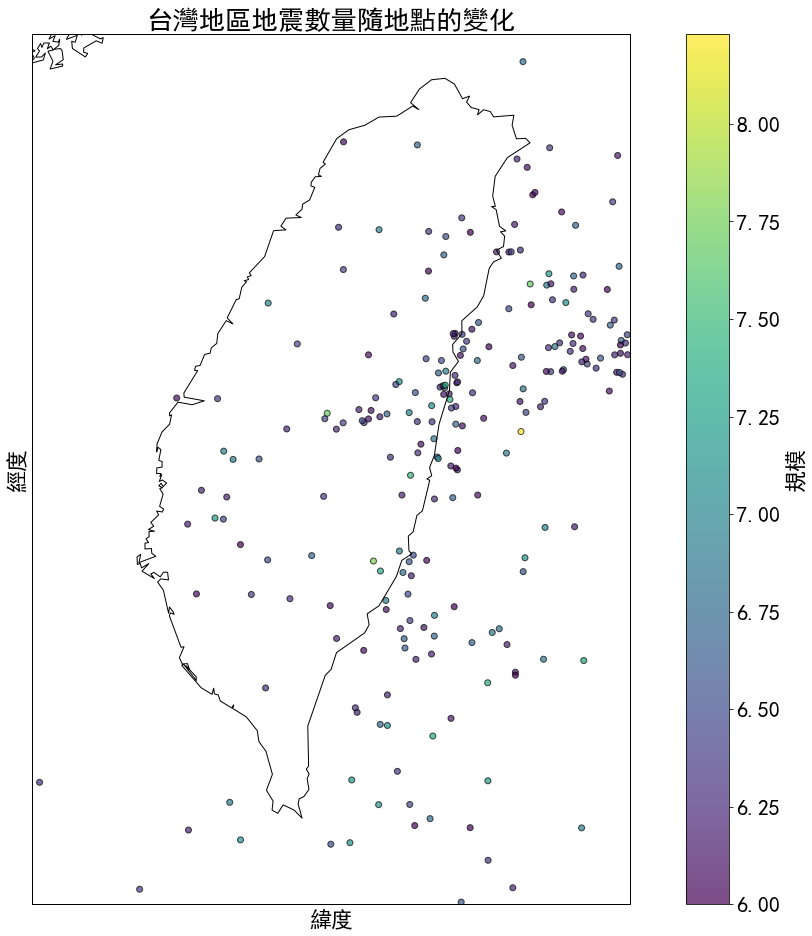

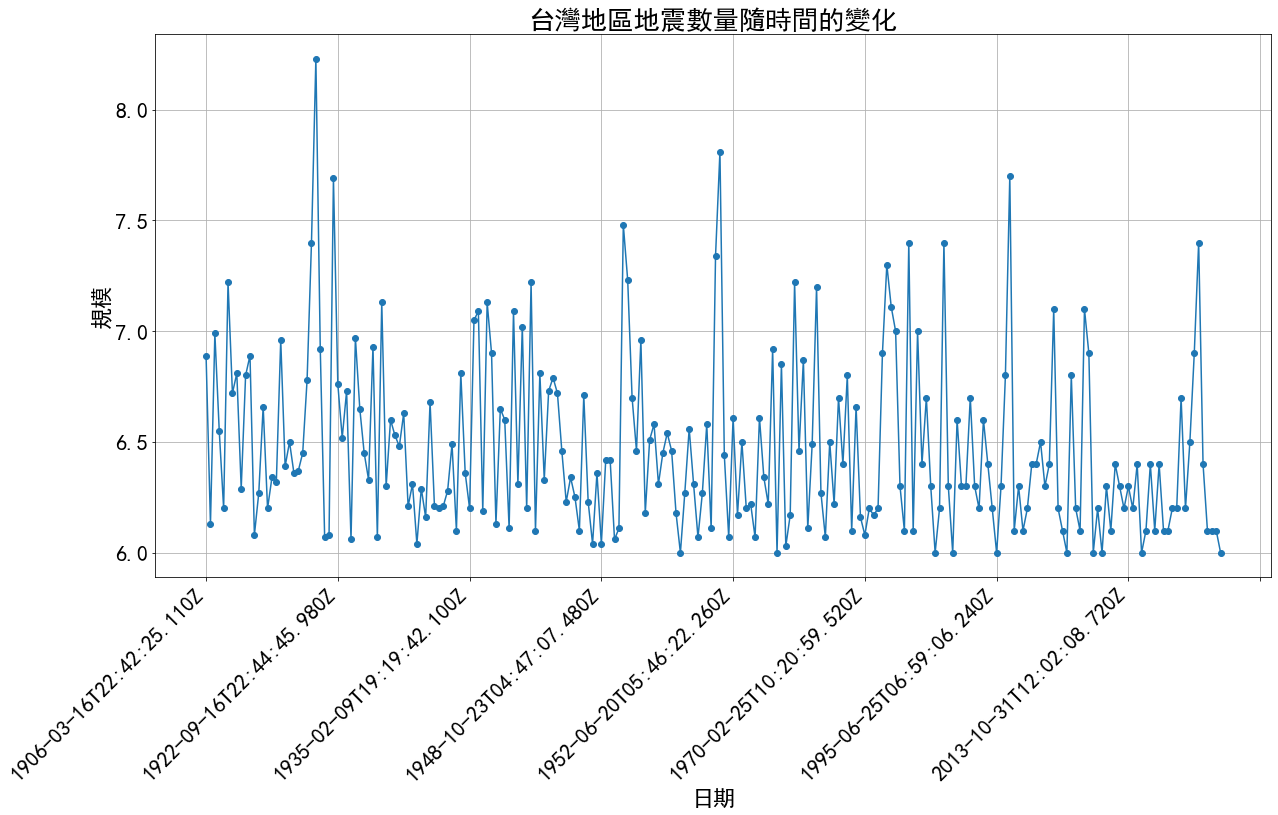

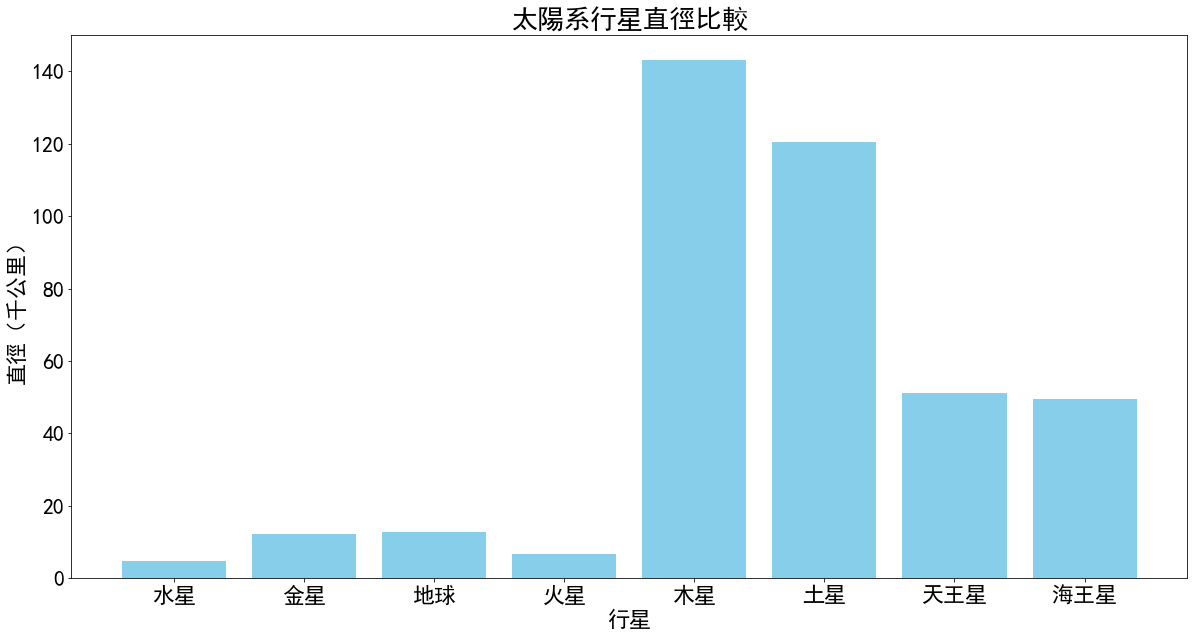

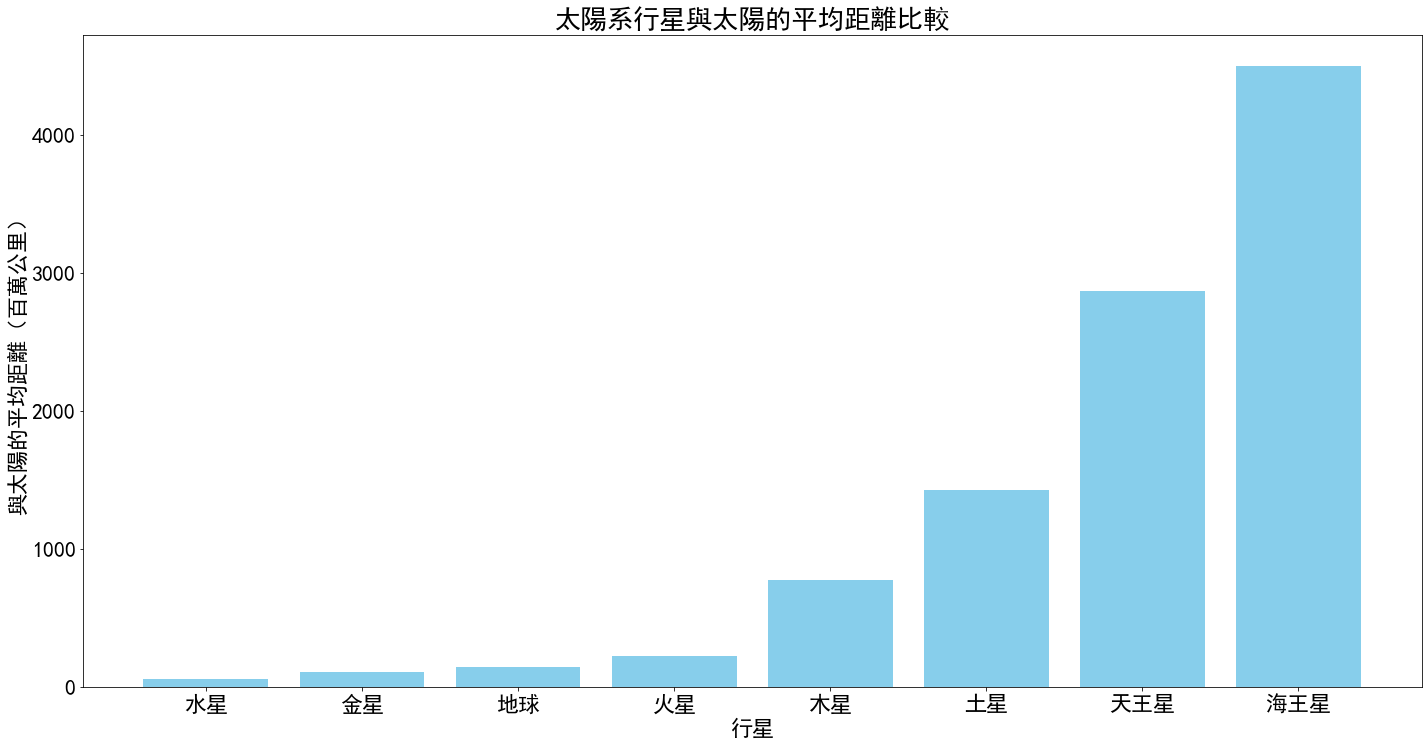

In [19]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 設置字體
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字體顯示中文
plt.rcParams['axes.unicode_minus'] = False  # 用於正常顯示負號

# 調整整體字體大小
plt.rcParams.update({'font.size': 22})  # 原始字體大小的一半是 11，放大兩倍即為 22

# USGS 地震數據API的URL
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

# 設置查詢參數
params = {
    'starttime': '1600-01-01',  # 開始日期（1600年1月1日）
    'endtime': '2025-02-15',    # 結束日期（2025年2月15日）
    'minmagnitude': 6.0,        # 最小規模
    'minlatitude': 21.5,        # 台灣的最小緯度
    'maxlatitude': 25.5,        # 台灣的最大緯度
    'minlongitude': 119.5,      # 台灣的最小經度
    'maxlongitude': 122.5,      # 台灣的最大經度
    'format': 'csv'             # 資料格式
}

# 發送API請求
response = requests.get(url, params=params)

# 將數據寫入CSV文件，使用utf-8編碼
with open('earthquake_data.csv', 'w', encoding='utf-8') as file:
    file.write(response.text)

# 讀取CSV文件
data = pd.read_csv('earthquake_data.csv')

# 保留原始時間順序
data = data.sort_values(by='time', ascending=True)

# 檢查數據
print(data.head())

# 基本統計
print(data.describe())

# 列出第一個地震和最後一個地震
first_earthquake = data.iloc[0]
last_earthquake = data.iloc[-1]
print("第一個地震:")
print(first_earthquake)
print("最後一個地震:")
print(last_earthquake)

# 繪製台灣地圖並顯示地震數量隨地點的變化
plt.figure(figsize=(20, 16))  # 放大兩倍
m = Basemap(projection='merc', llcrnrlat=21.5, urcrnrlat=25.5, llcrnrlon=119.5, urcrnrlon=122.5, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()

# 繪製地震位置
x, y = m(data['longitude'].values, data['latitude'].values)
sc = m.scatter(x, y, c=data['mag'], cmap='viridis', marker='o', edgecolors='k', alpha=0.7)
plt.colorbar(sc, label='規模')
plt.title('台灣地區地震數量隨地點的變化')
plt.xlabel('緯度')
plt.ylabel('經度')
plt.show()

# 地震數量隨時間的變化
plt.figure(figsize=(20, 10))  # 放大兩倍
plt.plot(data['time'], data['mag'], marker='o')
plt.title('台灣地區地震數量隨時間的變化')
plt.xlabel('日期')
plt.ylabel('規模')
plt.grid(True)

# 調整年份標籤的顯示間隔
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # 根據需要調整間隔

plt.show()

# 定義行星名稱和直徑資料
planets = ['水星', '金星', '地球', '火星', '木星', '土星', '天王星', '海王星']
diameters = [4.88, 12.10, 12.74, 6.79, 142.98, 120.53, 51.12, 49.53]

# 繪製行星直徑比較圖
plt.figure(figsize=(20, 10))  # 放大兩倍
plt.bar(planets, diameters, color='skyblue')
plt.xlabel('行星')
plt.ylabel('直徑（千公里）')
plt.title('太陽系行星直徑比較')
plt.show()

# 定義行星名稱和距離資料
distances = [57.9, 108.2, 149.6, 227.9, 778.3, 1429.4, 2870.9, 4498.3]

# 繪製行星與太陽距離比較圖
plt.figure(figsize=(24, 12))  # 放大兩倍
plt.bar(planets, distances, color='skyblue')
plt.xlabel('行星')
plt.ylabel('與太陽的平均距離（百萬公里）')
plt.title('太陽系行星與太陽的平均距離比較')
plt.show()


In [ ]:
(1)Red: 2020-10-30 19:51 UTC+8 Néon Karlovásion, Greece M7.0
(2)Orange: 2021-11-28 18:52 UTC+8 Barranca, Peru M7.5
(3)Green: 2023-02-06 09:17 UTC+8 Kahramanmaraş, Turkey M7.8
(4)Blue: 2024-01-01 15:10 UTC+8 Anamizu, Japan M7.5
(5)Purple: 

In [ ]:
(1)Red: 2024-05-12 11:39 UTC Brisas Barra de Suchiate, Mexico M6.4
(2)Orange: 2024-07-11 02:13 UTC Sangay, Philippines M7.1

In [ ]:
2019-05-26 07:41 UTC Lagunas, Peru M8.0
2020-07-22 06:12 UTC Perryville, Alaska M7.8
2021-07-29 06:15 UTC Perryville, Alaska M8.2
2022-05-26 12:02 UTC Azángaro, Peru M7.2
2024-04-02 23:58 UTC Hualien, Taiwan M7.4


In [ ]:
An M6.9 big quake happened in Alaska, as I predicted (https://www.patreon.com/posts/54867909).
2021-08-14 11:57 UTC Perryville, Alaska M6.9


In [ ]:
2008-05-12 06:28 UTC eastern Sichuan, China M7.9

In [10]:
#let's download earthquakes from USGS
"""
import obspy
from matplotlib import pyplot as plt
from obspy.clients.fdsn import Client as FDSN_Client

usgs = FDSN_Client("USGS") #establish connection in the same way as auspass. n.b."USGS" has its own shortcut, no address needed

#let's just download ALL earthquakes in the southern hemisphere during January 2016 greater than M6
events = usgs.get_events(starttime=obspy.UTCDateTime(2016,1,1), endtime=obspy.UTCDateTime(2016,2,1), maxlatitude=0, minmagnitude=6)

#show results & plot
print(events)
events.plot()
plt.close()
"""

'\nimport obspy\nfrom matplotlib import pyplot as plt\nfrom obspy.clients.fdsn import Client as FDSN_Client\n\nusgs = FDSN_Client("USGS") #establish connection in the same way as auspass. n.b."USGS" has its own shortcut, no address needed\n\n#let\'s just download ALL earthquakes in the southern hemisphere during January 2016 greater than M6\nevents = usgs.get_events(starttime=obspy.UTCDateTime(2016,1,1), endtime=obspy.UTCDateTime(2016,2,1), maxlatitude=0, minmagnitude=6)\n\n#show results & plot\nprint(events)\nevents.plot()\nplt.close()\n'

In [ ]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("2020-09-01T00:00:00")
t2 = UTCDateTime("2020-09-10T00:00:00")
st = client.timeseries("KO", "DKL", "", "BHE", t1, t2,
    #filter=[
        #"decimate=3"
        #"decimate=20"
    #],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In [ ]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("2020-10-05T00:00:00")
t2 = UTCDateTime("2020-10-25T00:00:00")
st = client.timeseries("KO", "SNOP", "", "BHN", t1, t2,
    #filter=[
        #"decimate=3"
        #"decimate=20"
    #],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In [ ]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("1999-07-08T00:00:00")
t2 = UTCDateTime("1999-08-08T00:00:00")
st = client.timeseries("II", "KIV", "00", "BHE", t1, t2,
    #filter=[
        #"decimate=3"
        #"decimate=20"
    #],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In [11]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("1999-09-20T00:00:00")
t2 = UTCDateTime("1999-09-22T00:00:00")
st = client.timeseries("TW", "TWGB", "", "BHE", t1, t2,
)
print(len(st[0].data))
print(st[0].data)
st.plot()

IndexError: list index out of range

In [12]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("1999-09-03T00:00:00")
t2 = UTCDateTime("1999-09-13T00:00:00")
st = client.timeseries("TW", "SSLB", "", "BHE", t1, t2,
    filter=[
        #"decimate=3"
        "decimate=20"
    ],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

IndexError: list index out of range

In [ ]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("1999-09-20T00:00:00")
t2 = UTCDateTime("1999-09-22T00:00:00")
st = client.timeseries("TW", "SSLB", "", "BHE", t1, t2,
    filter=[
        #"decimate=3"
        "decimate=20"
    ],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In [13]:
# 抓取 IRIS TW.NACB 寧安橋站的訊號並畫圖

import obspy
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt

# 初始化 IRIS 客戶端
client = Client("IRIS")

# 指定地震儀站和時間範圍
network = "TW"
station = "NACB"
location = ""  # 使用空字符串來表示所有位置
channel = "BHE"
starttime = obspy.UTCDateTime("2025-01-17")
endtime = obspy.UTCDateTime("2025-01-18")

# 抓取地震訊號
response = client.get_waveforms(network, station, location, channel, starttime, endtime)

# 繪製訊號
response.plot()
plt.show()

TypeError: Format "MSEED" is not supported. Supported types: 

In [ ]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("2020-08-23T00:00:00")
t2 = UTCDateTime("2020-09-28T00:00:00")
st = client.timeseries("IU", "MAJO", "00", "BH1", t1, t2,
    filter=[
        #"decimate=3"
        "decimate=20"
    ],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In [ ]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("2021-04-21T00:00:00")
t2 = UTCDateTime("2021-05-21T00:00:00")
st = client.timeseries("IC", "LSA", "00", "BHZ", t1, t2,
    #filter=[
        #"decimate=3"
        #"decimate=20"
    #],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In [ ]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("2020-08-08T00:00:00")
t2 = UTCDateTime("2020-08-18T00:00:00")
st = client.timeseries("PB", "B057", "", "EH1", t1, t2,
    filter=[
        "decimate=3"
        #"decimate=20"
        #"decimate=100"
    ],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In [ ]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("2020-08-04T00:00:00")
t2 = UTCDateTime("2020-08-05T00:00:00")
st = client.timeseries("KO", "GAZ", "", "BHE", t1, t2,
    filter=[
        "decimate=3"
        #"decimate=20"
    ],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In [ ]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

t1 = UTCDateTime("2011-01-21T00:00:00")
t2 = UTCDateTime("2011-03-11T00:00:00")

diff_t = int((t2 - t1) / 86400)
diff_t

In [ ]:
Tomato plant voltage signals (0.1 Hz high-pass filtered) for 2008-05-12 China M7.9.

In [ ]:
Quake signals:
(1)Green: 2008-05-12 06:28 UTC eastern Sichuan, China M7.9
    
Tomato plant voltage signals (0.1 Hz high-pass filtered) for 2008-05-12 China M7.9.
    
台灣地震預測研究所所長 林湧森
台湾地震予測研究所所長 林湧森
Dyson Lin, Founder & CEO, Taiwan Quake Forecast Institute
Dyson Lin, Kurucu ve CEO, Tayvan Deprem Tahmin Enstitüsü
2020-09-24 10:15 UTC+8

In [ ]:
# How to predict earthquakes by air voltage signals with Arduino and Python

In [18]:
name_new_files(file_number=3, to_WeChat=False, date_stamp='2025-02-06')

In [16]:
name_new_files(file_number=3, to_WeChat=True, date_stamp='2025-02-06')

FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.

In [ ]:
analyze_file(1)

In [7]:
#languages = ['Chinese', 'Japanese', 'English', 'Turkish',]
languages = ['Chinese', 'English',]

In [8]:
# Yellow

quake_forecast = [
                  
{
    'color': Yellow,
    'time': 12,
    'location': {
        'Chinese': '日本、台灣、菲律賓東部（達沃附近）或印尼東北部（菲律賓達沃附近），',
        'English': 'Japan, Taiwan, eastern Philippines (near Davao) or northeastern Indonesia (near Davao, Philippines), ',
     },
     'magnitude': 'M6.5'
},
]

In [41]:
# Orange

quake_forecast = [
                  
{
    'color': Orange,
    'time': 36,
    'location': {
        'Chinese': '加州、日本、台灣、菲律賓東部（達沃附近）或印尼東北部（菲律賓達沃附近），',
        'English': 'California, Japan, Taiwan, eastern Philippines (near Davao) or northeastern Indonesia (near Davao, Philippines), ',
     },
     'magnitude': 'M6.5'
},
]

In [32]:
# Purple

quake_forecast = [
                  
{
    'color': Purple,
    'time': 60,
    'location': {
        'Chinese': '歐洲、南美洲或日本（緯度與義大利接近的地區），',
        'English': 'Europe, South America or Japan (areas with latitudes close to Italy), ',
     },
     'magnitude': 'M7.5'
},
]

In [17]:
# Red

quake_forecast = [
                  
{
    'color': Red,
    'time': 75,
    'location': {
        'Chinese': '日本、台灣、菲律賓東部（達沃附近）或印尼東北部（菲律賓達沃附近），',
        'English': 'Japan, Taiwan, eastern Philippines (near Davao) or northeastern Indonesia (near Davao, Philippines), ',
     },
     'magnitude': 'M7.5'
},
]

In [8]:
# Blue

quake_forecast = [
                  
{
    'color': Blue,
    'time': 7,
    'location': {
        'Chinese': '日本南部或台灣，',
        'English': 'southern Japan or Taiwan, ',
     },
     'magnitude': 'M6.4'
},
]

In [3]:
# Green

quake_forecast = [
                  
{
    'color': Green,
    'time': 10,
    'location': {
        'Chinese': '印尼，',
        'English': 'Indonesia, ',
     },
     'magnitude': 'M7.4+'
},
]

In [5]:
# Yellow

quake_forecast = [
                  
{
    'color': Yellow,
    'time': 7,
    'location': {
        'Chinese': '日本南部或台灣，',
        'English': 'southern Japan or Taiwan, ',
     },
     'magnitude': 'M6.4'
},
]

In [15]:
# Yellow

quake_forecast = [
                  
{
    'color': Yellow,
    'time': 30,
    'location': {
        'Chinese': '日本、台灣、菲律賓東部（達沃附近）或印尼東北部（菲律賓達沃附近），',
        'English': 'Japan, Taiwan, eastern Philippines (near Davao) or northeastern Indonesia (near Davao, Philippines), ',
     },
     'magnitude': 'M7.0'
},
]

In [17]:
# Orange

quake_forecast = [
                  
{
    'color': Orange,
    'time': 7,
    'location': {
        'Chinese': '加州（外海）、阿拉斯加或日本，',
        'Japanese': 'カリフォルニア（オフショア）、アラスカまたは日本、',
        'English': 'California (offshore), Alaska, or Japan, ',
        'Turkish': 'Kaliforniya (açık deniz), Alaska veya Japonya, ',
     },
     'magnitude': 'M7.5'
},
]

In [9]:
time_stamp = get_time_stamp()

(title_, title) = get_Quake_Forecast_title(quake_forecast, languages, time_stamp)
print(title)
print()

text = get_Quake_Forecast_text(quake_forecast, languages, time_stamp)
print(text)

2024-12-28 21:49 UTC+8 地震預報：(1)黃：12天以內，日本、台灣、菲律賓東部（達沃附近）或印尼東北部（菲律賓達沃附近），M6.5。 Quake Forecast: (1)Yellow: Within 12 days, Japan, Taiwan, eastern Philippines (near Davao) or northeastern Indonesia (near Davao, Philippines), M6.5.

地震預報：
(1)黃：12天以內，日本、台灣、菲律賓東部（達沃附近）或印尼東北部（菲律賓達沃附近），M6.5

台灣地震預測研究所 所長
林湧森
2024-12-28 21:49 UTC+8


Quake Forecast: 
(1)Yellow: Within 12 days, Japan, Taiwan, eastern Philippines (near Davao) or northeastern Indonesia (near Davao, Philippines), M6.5

Dyson Lin
Founder & CEO, Taiwan Quake Forecast Institute
2024-12-28 21:49 UTC+8


In [8]:
# post_to_Patreon
click_Patreon_New_Post_button()


FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.

In [44]:
click_Patreon_Images_button()


In [10]:
click_Patreon_Upload_Images_button()
analysis_file_name = get_file_name(1, file_type='analysis')
print(analysis_file_name)

click_Patreon_Upload_Images_field()
paste_Patreon_analysis_file_name()

2024-12-26 宜蘭站 Yilan Station (NI USB-6210) 1 - Analysis


In [11]:
paste_Patreon_title(title)

In [12]:
paste_Patreon_text(text)

In [16]:
click_Next_button()

In [35]:
click_Patreon_Public_button()

In [58]:
click_Patreon_Publish_Now_button()

In [13]:
# copy to clipboard

Patreon_address = get_Patreon_address()
print(Patreon_address)

post_text = title + '\n' + Patreon_address
print(post_text)
pyperclip.copy(post_text) # copy to clipboard


https://www.patreon.com/posts/118827268
2024-12-28 21:49 UTC+8 地震預報：(1)黃：12天以內，日本、台灣、菲律賓東部（達沃附近）或印尼東北部（菲律賓達沃附近），M6.5。 Quake Forecast: (1)Yellow: Within 12 days, Japan, Taiwan, eastern Philippines (near Davao) or northeastern Indonesia (near Davao, Philippines), M6.5.
https://www.patreon.com/posts/118827268


In [ ]:
# Post to Telegram
post_to_Telegram(post_text)

In [19]:
# Post to WeChat
post_to_WeChat(post_text)

In [46]:
# Post to Facebook dysondyson
post_to_Facebook_dysondyson(post_text)

pyautogui.scroll(-1000) # scroll down
time.sleep(1)

pyautogui.scroll(-500) # scroll down
time.sleep(1)